<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Pipeline de Dados do Telegram II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Ingestão;</li>
  <li>ETL;</li>
  <li>Apresentação;</li>
  <li>Storytelling.</li>
</ol>

---

# **Exercícios**

## 1\. Ingestão

Replique as atividades da aula 1.

### **1.1. AWS S3**

1.1.1 Crie um `bucket` no `AWS S3` para o armazenamento de dados crus, não se esqueça de adicionar o sufixo `-raw`.

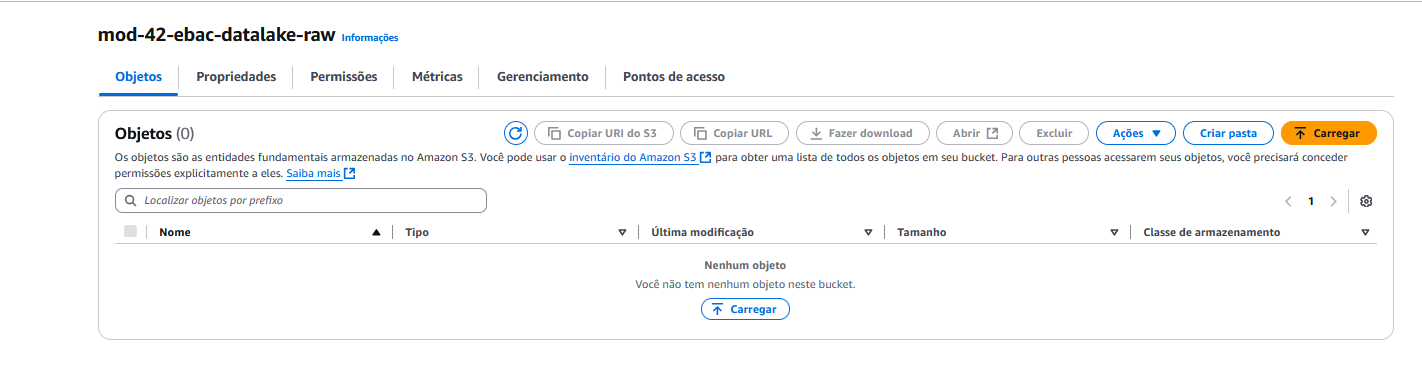

### **1.2. AWS Lambda**

1.2.1. Crie uma função no `AWS Lambda` para recebimento das mensagens e armazenamento no formato JSON no `bucket` de dados crus. Não se esqueça de configurar as variáveis de ambiente e de adicionar as permissão de interação com `AWS S3` no `AWS IAM`.

**Criando a função no AWS Lambda e adicionando o código:**

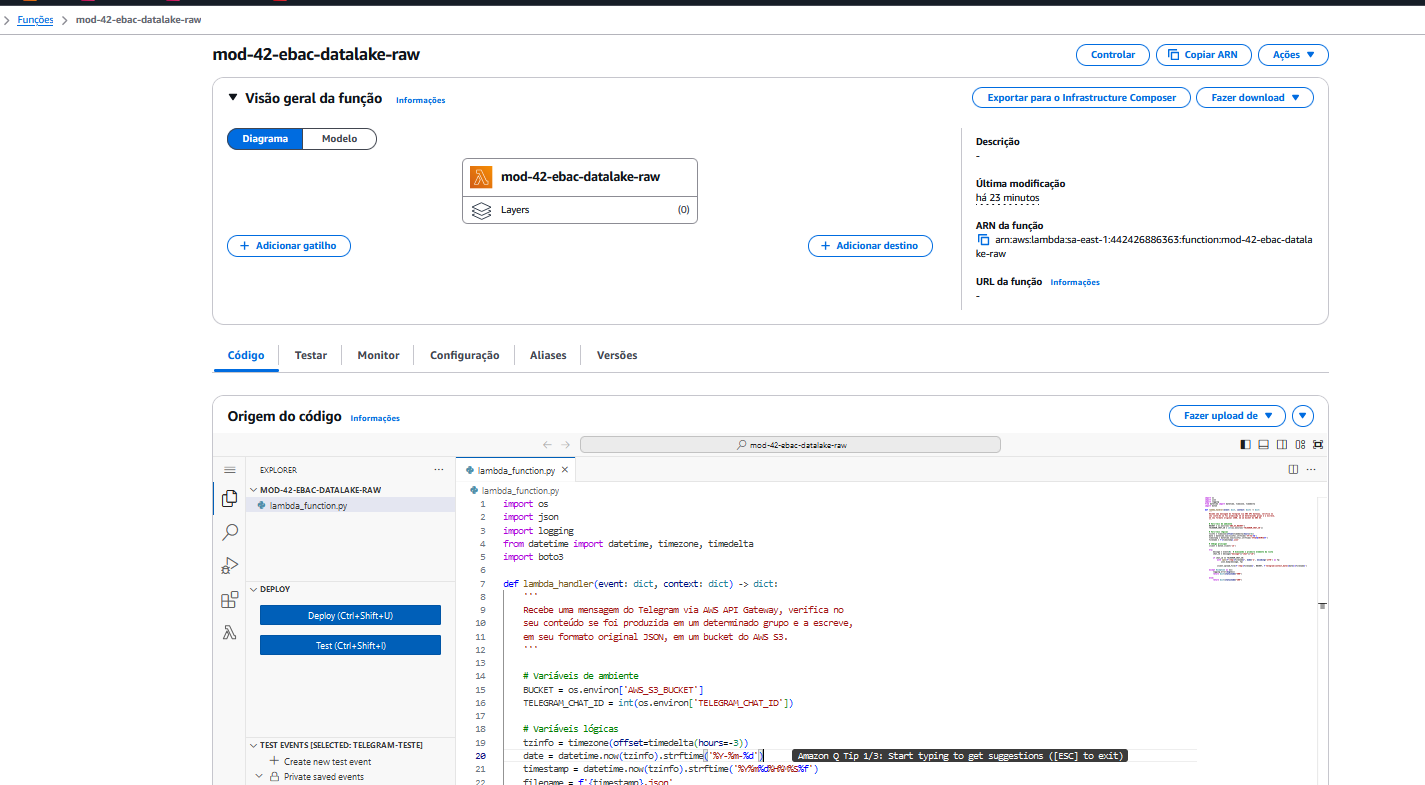

> **Nota**: Para testar a função com evento do próprio `AWS Lambda`, substitua o código `message = json.loads(event["body"])` por `message = event`. Lembre-se que o primeiro só faz sentido na integração com o `AWS API Gateway`.

**Criando e Configurando variáveis de ambiente no lambda:**

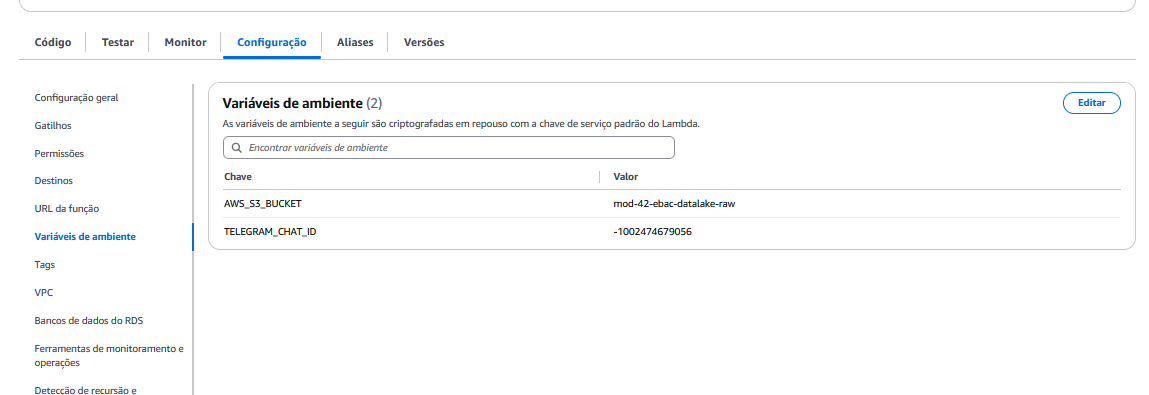

**Adicionando permissões para que o código possa interagir com o AWS S3:**

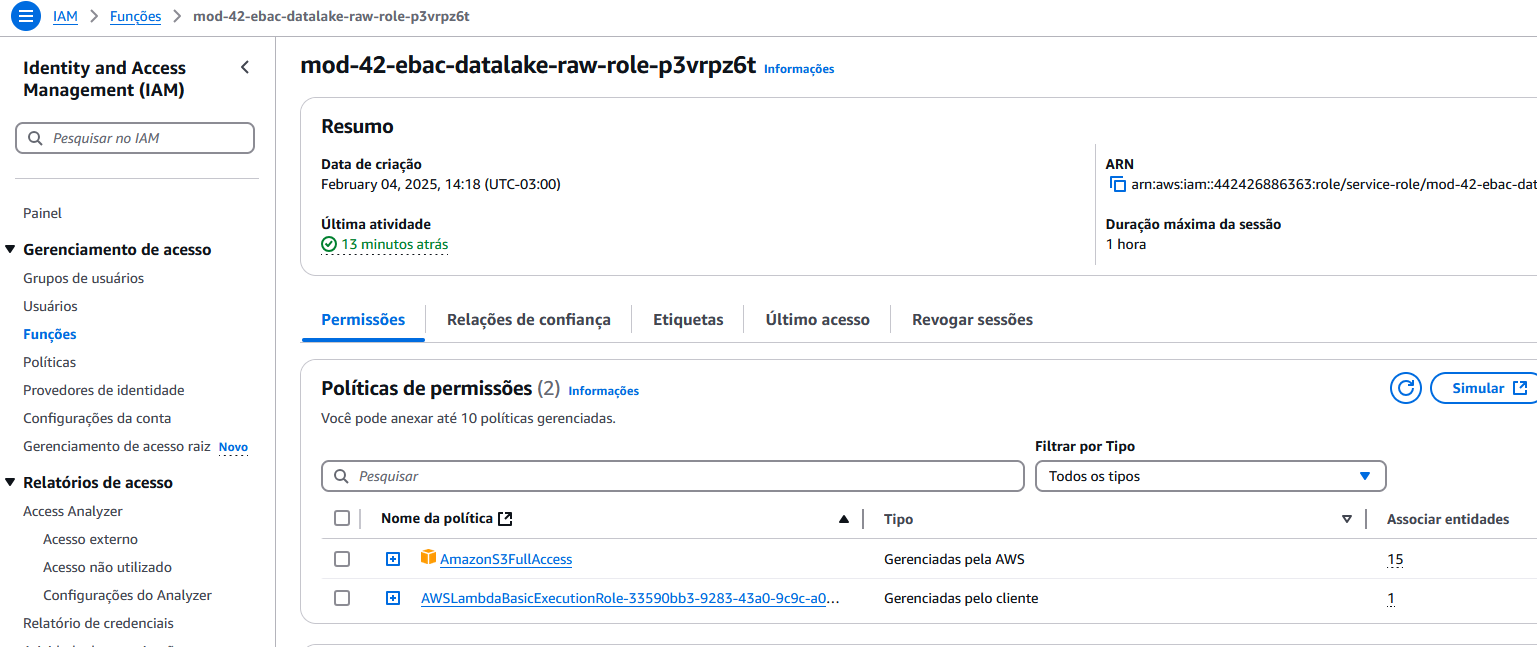

**Criado um evento de teste de envio de dados para o AWS S3 bucket sendo realizado com sucesso:**

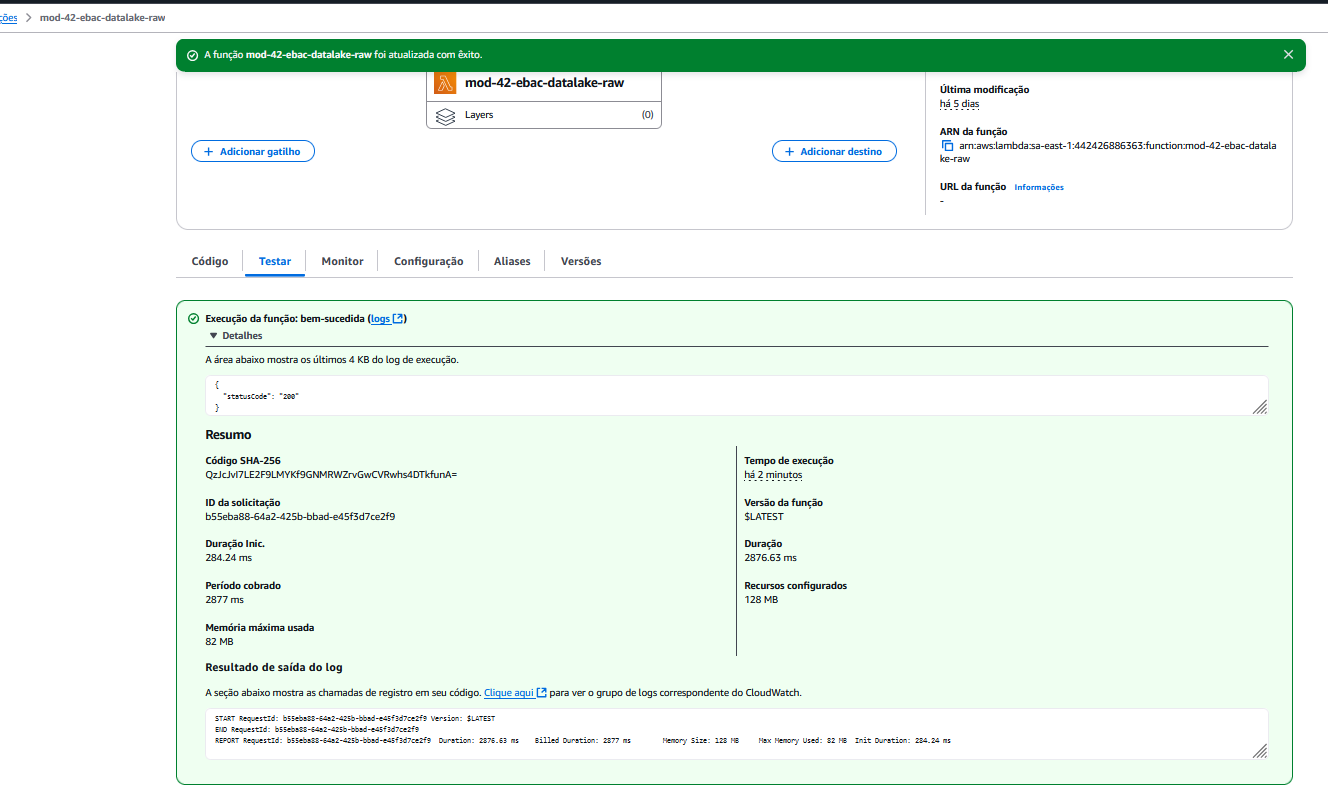

**Verificando arquivo armazenado no S3 Bucket:**

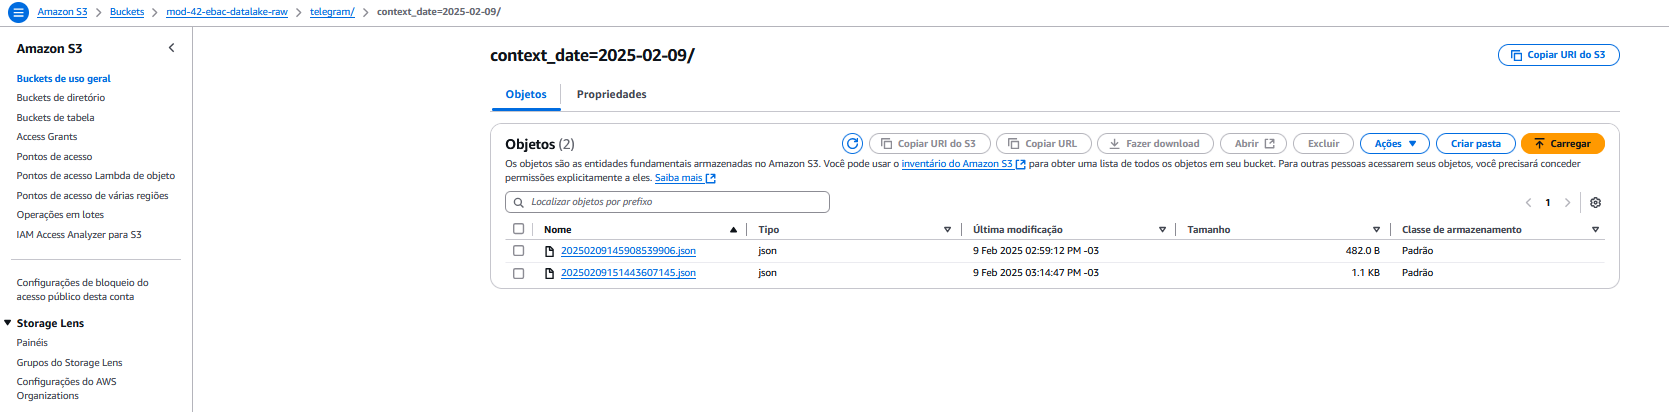

**Depois de concluir teste habilita linha de código no código:**

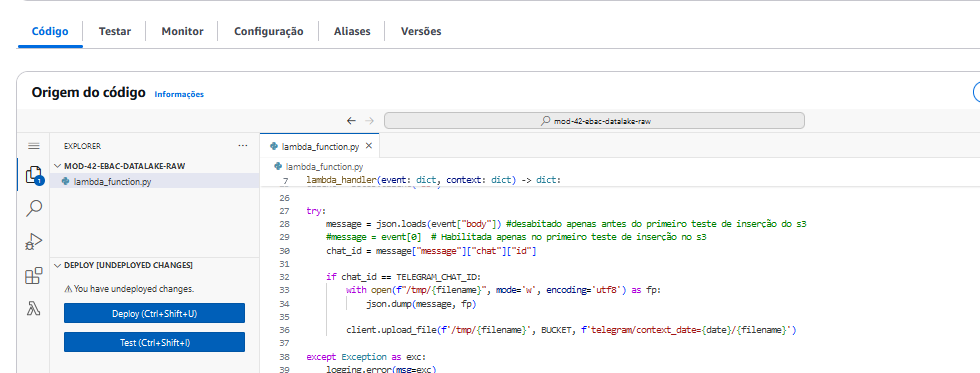

### **1.3. AWS API Gateway**

1.3.1. Criado uma API no `AWS API Gateway` a conectando a função do `AWS Lambda`, conforme apresentado em documentação.

**No amazon criando API REST de controle total:**

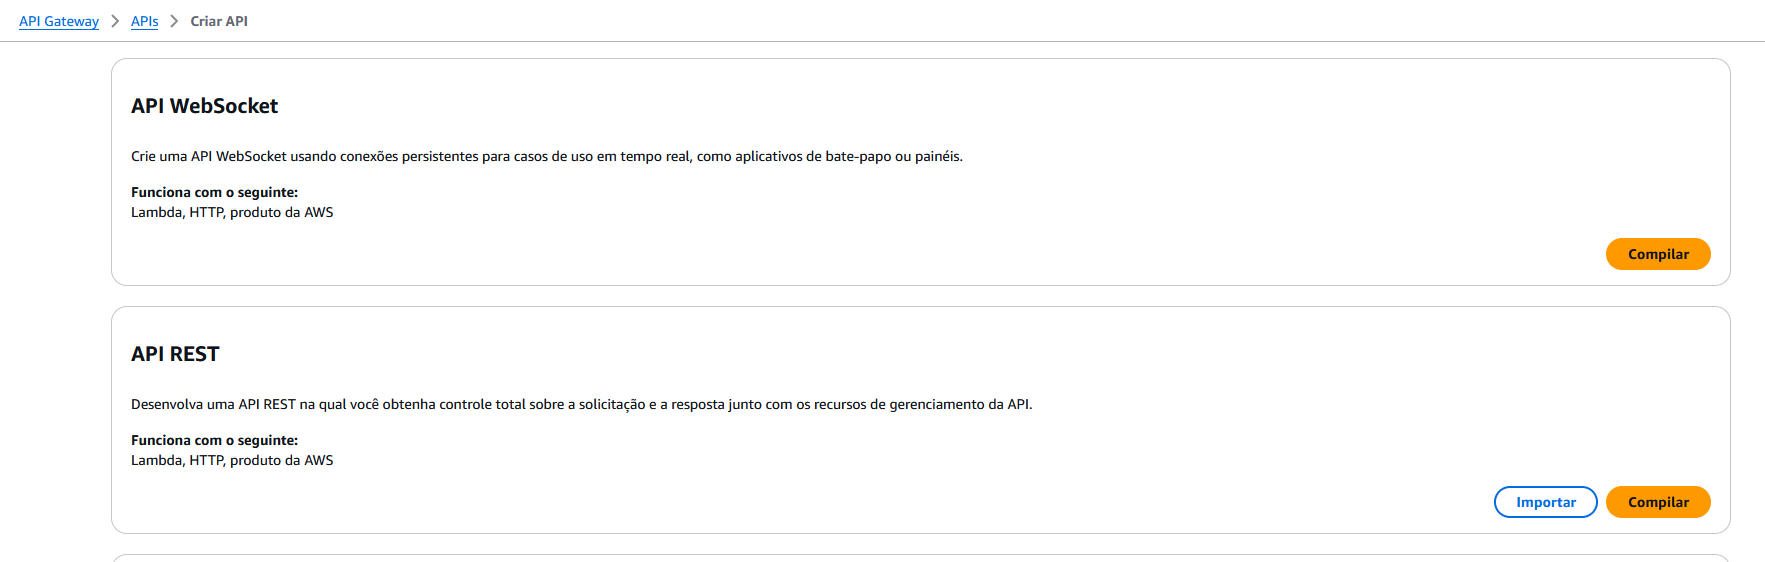

**API criada:**

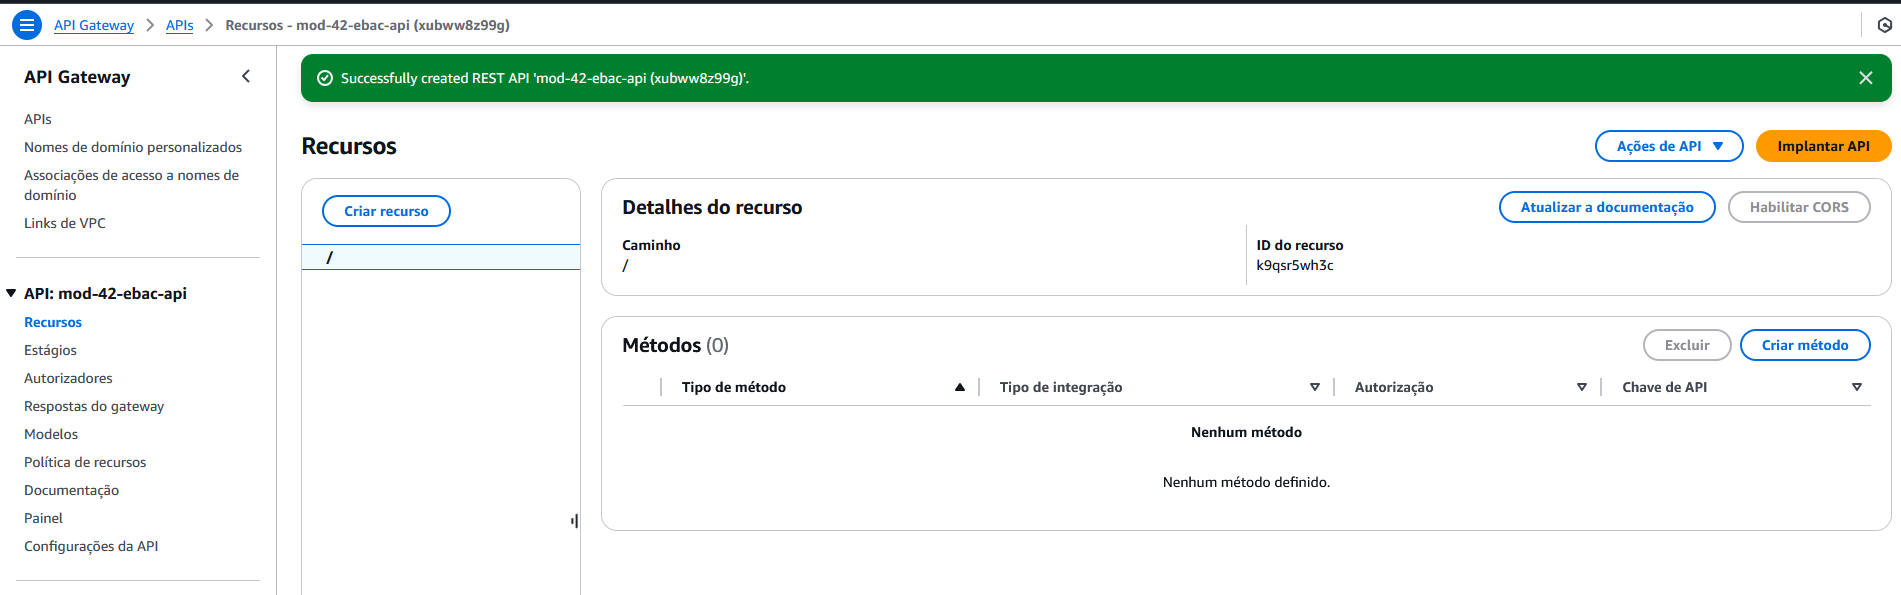

> **Nota**: não disponibilize o endereço da API gerada.

**Criando um método HTTP para essa API:**

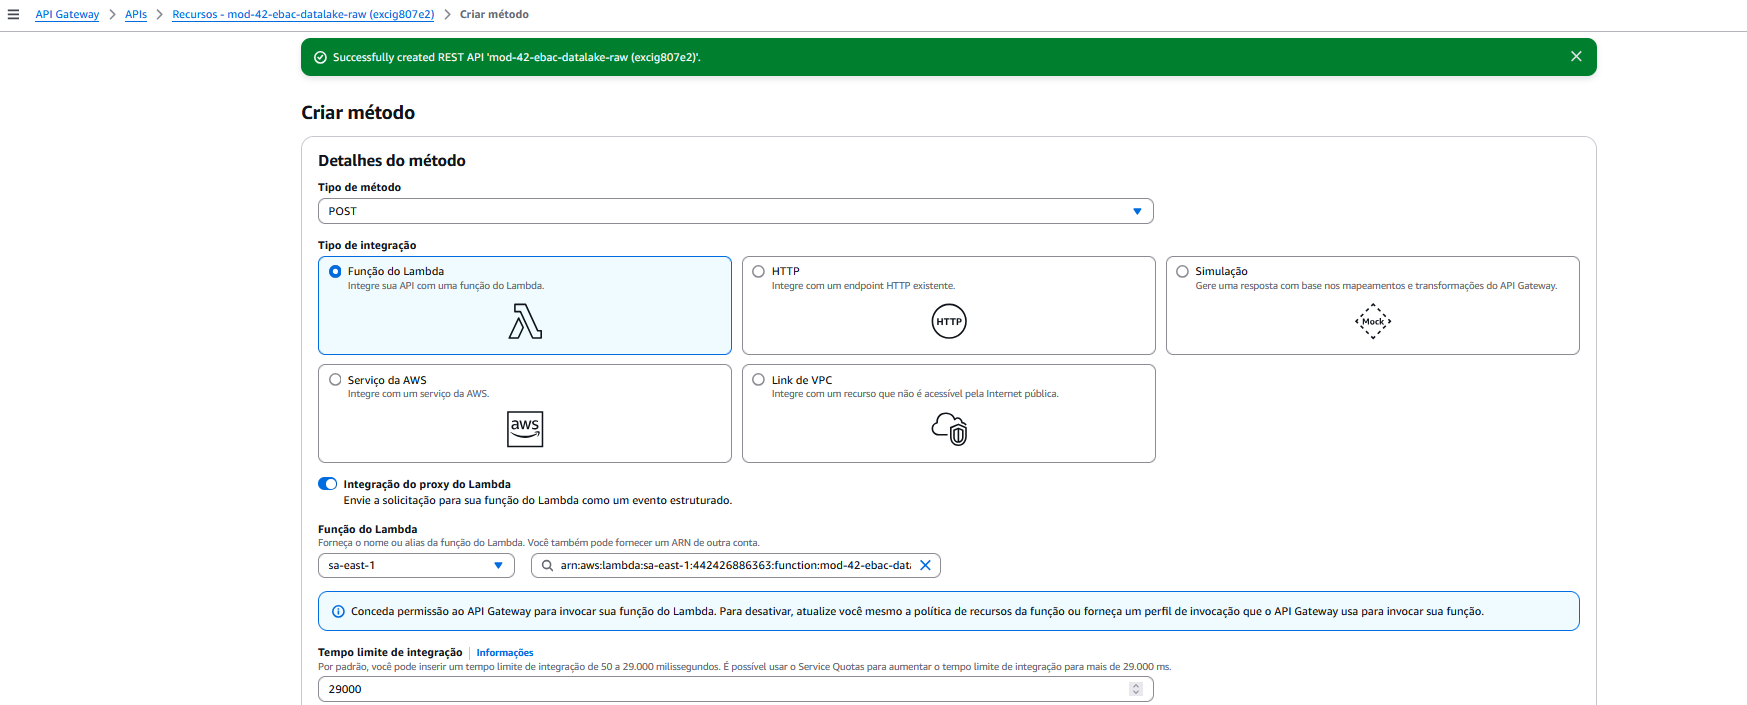

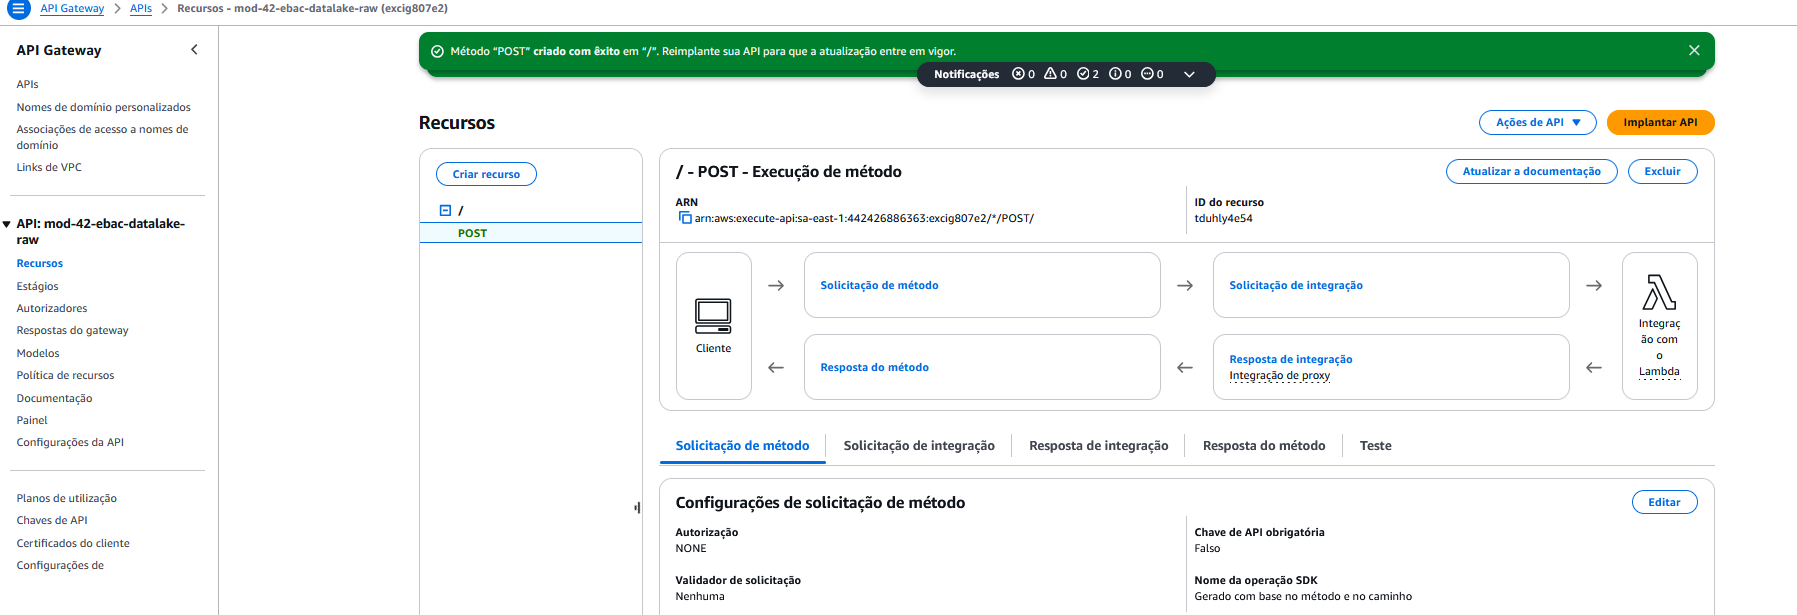

**Devemos testar e fazer a implantação:**

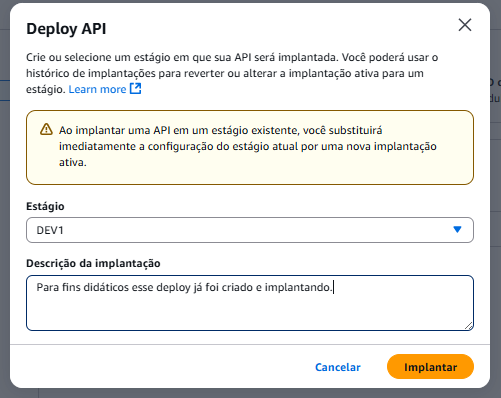

**Ao implantar ao criarmos um estagio novo é gerado uma URL:**

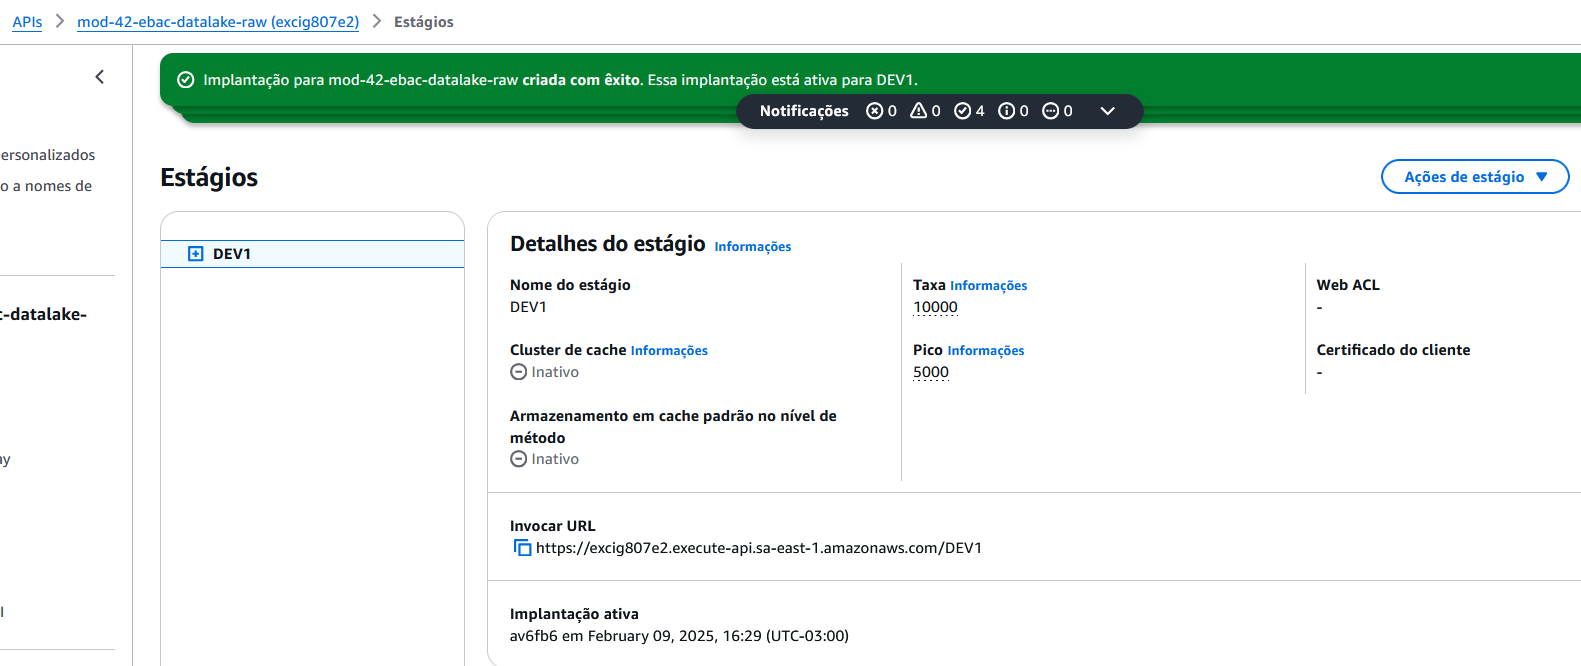

**Copiando  a `url` gerada na variável `aws_api_gateway_url`.**

### **1.4. Telegram**

Nessa etapa foi realizada a Criação de chatbot no Telegram e Grupo

1.4.1. Criei um bot através do botfather.

Nome do Bot: **Cloud-9**

Nome de usuário do Bot: **Ebacm43_bot**

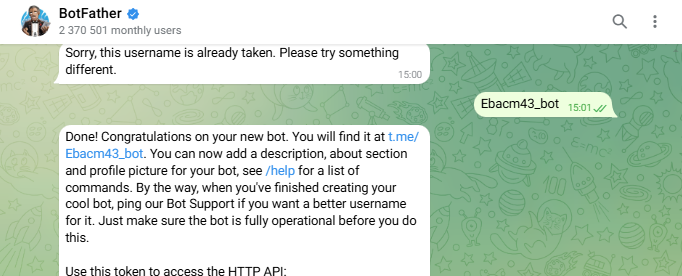

1.4.2.Criei um grupo e adicionei o bot.

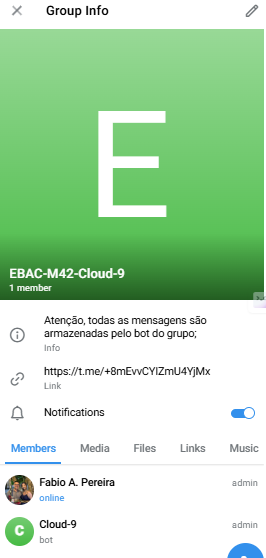

1.4.3.Tornei o bot administrador do grupo.

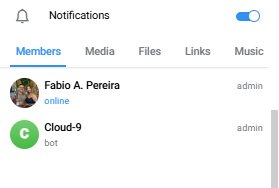

1.4.4.Desabilitei a opção de adicionar o bot a novos grupos.

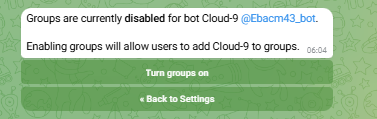



1.4.5.Como teste foi enviado diversos tipos de mensagens no grupo (text, imagem, arquivos, vídeo, áudio, etc.) Para enfim, chegar na parte de configurar o consumo utilizando a API de bots do Telegram.

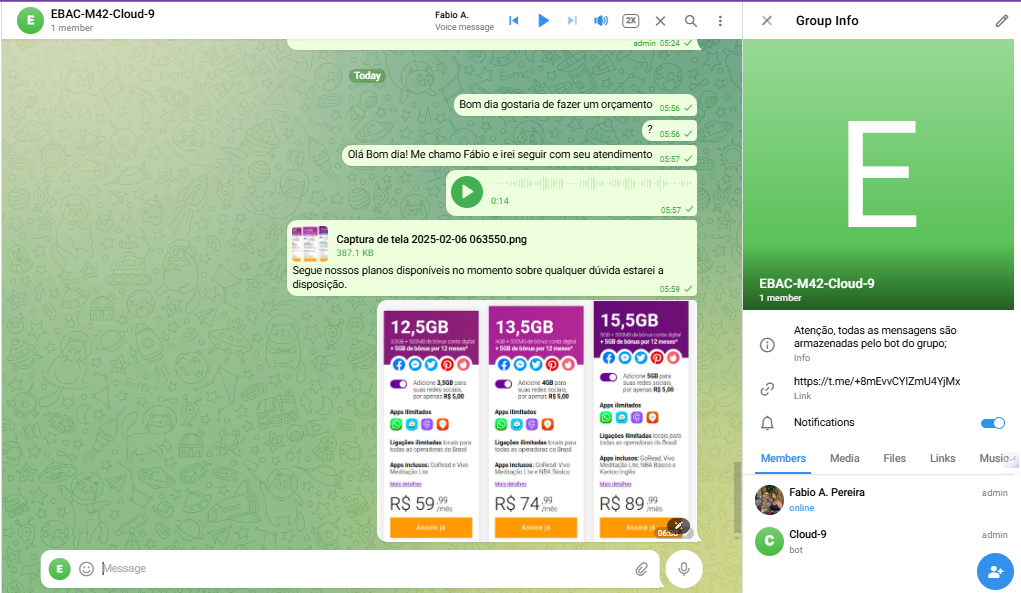

> **Nota:** A documentação completa da API pode ser encontrada neste [link](https://core.telegram.org/bots/api)

1.4.6.Realizando teste com Bot API

In [ ]:
from getpass import getpass

token = getpass()

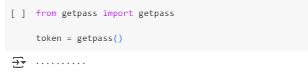

In [ ]:
import json

base_url = f'https://api.telegram.org/bot{token}'

- **getMe**

Utilizado o método getMe como teste para ver se  retorna informações sobre o bot.

In [ ]:
import requests

response = requests.get(url=f'{base_url}/getMe')

print(json.dumps(json.loads(response.text), indent=2))

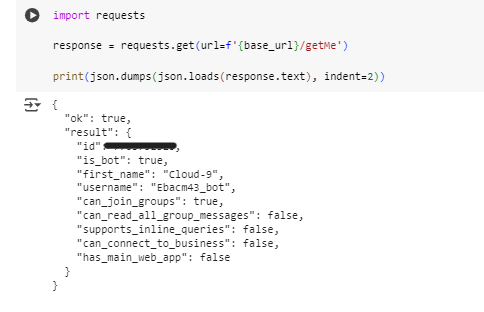

 - **getUpdates**

O método `getUpdates`retorna as mensagens captadas pelo bot.

In [ ]:
response = requests.get(url=f'{base_url}/getUpdates')

print(json.dumps(json.loads(response.text), indent=2))

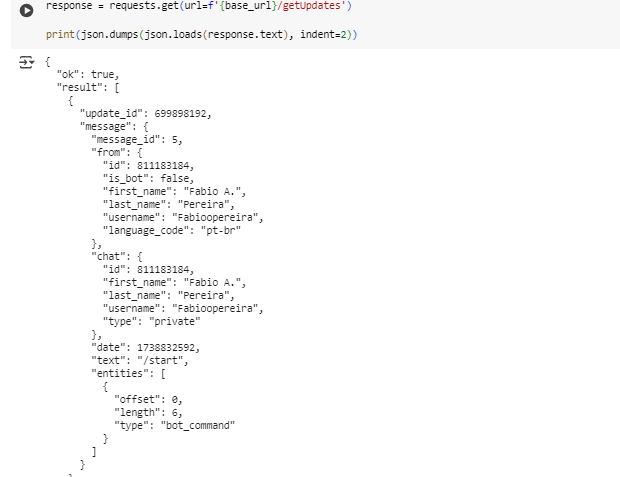

# 1.5. Webhook

Agora Vamos configurar o *webhook* do Telegram para redirecionar as mensagens para a `url` do `AWS API Gateway`.\\

O método `setWebhook` configura o redirecionamento das mensagens captadas pelo *bot* para o endereço *web* do parametro `url`.

**Nota:** os métodos getUpdates e setWebhook são mutualmente exclusivos, ou seja, enquanto o webhook estiver ativo, o método getUpdates não funcionará. Para desativar o webhook, basta utilizar o método deleteWebhook.

 - **setWebhook**

1.5.1.Para a configuração do telegram foi Configurando o *webhook* do *bot* através do método `setWebhook` da API de *bots* do **Telegram**. utilizado o endereço da API criada no `AWS API Gateway`.

In [ ]:
# Primeiro,foi instalado a biblioteca requests no ambiente Google Colab
!pip install requests

# Importar bibliotecas necessárias
import requests
import json
import os

# Defina a variável de ambiente para o token do Telegram
os.environ['TELEGRAM_BOT_TOKEN'] = 'TOKEN DO BOT INSERIDO AQUI'

# URL do AWS API Gateway
aws_api_gateway_url = "URL GERADA INSERIDA AQUI DO AWS"

# Acessar o token do bot do Telegram da variável de ambiente
bot_token = os.getenv('TELEGRAM_BOT_TOKEN')

# URL base da API do Telegram
base_url = f'https://api.telegram.org/bot{bot_token}'

# Configure o webhook
set_webhook_url = f'{base_url}/setWebhook?url={aws_api_gateway_url}'
response = requests.get(set_webhook_url)

# Exiba a resposta formatada em JSON
print("Resposta ao configurar o webhook:")
print(json.dumps(json.loads(response.text), indent=2))


Resposta ao configurar o webhook:
{
  "ok": true,
  "result": true,
  "description": "Webhook is already set"
}


**Imagem do resultado:**

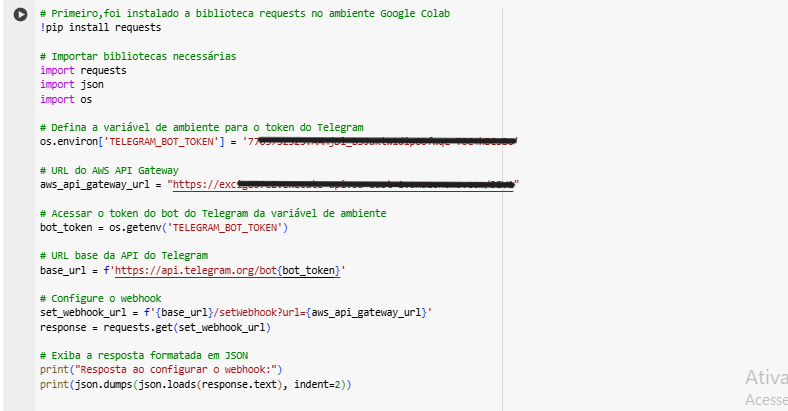

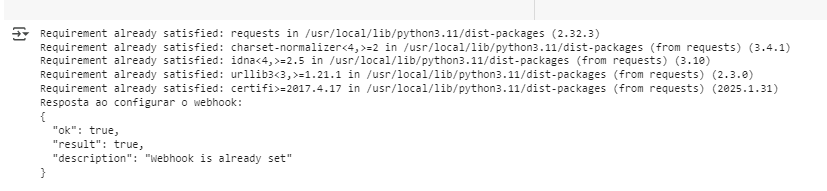

> **Nota**: Nunca disponibilize o *token* de acesso ao seu *bot* da API de *bots* do **Telegram**.

 - **getWebhookInfo**

1.5.2.O método `getWebhookInfo` retorna as informações sobre o *webhook* configurado.

In [ ]:
response = requests.get(url=f'{base_url}/getWebhookInfo')

print(json.dumps(json.loads(response.text), indent=2))

**Imagem do Resultado:**

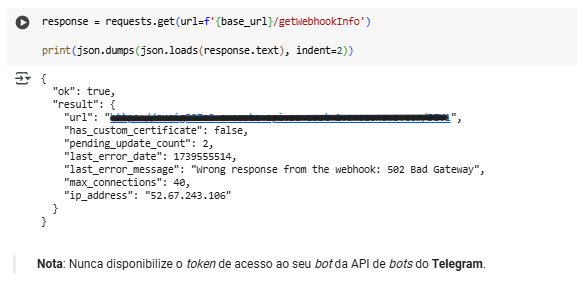

1.5.3.Realizando teste para ver se o Lambda foi capaz de salvar os dados do telegram no AWS S3.Antes foi inserido informações no Chat de Telegram.

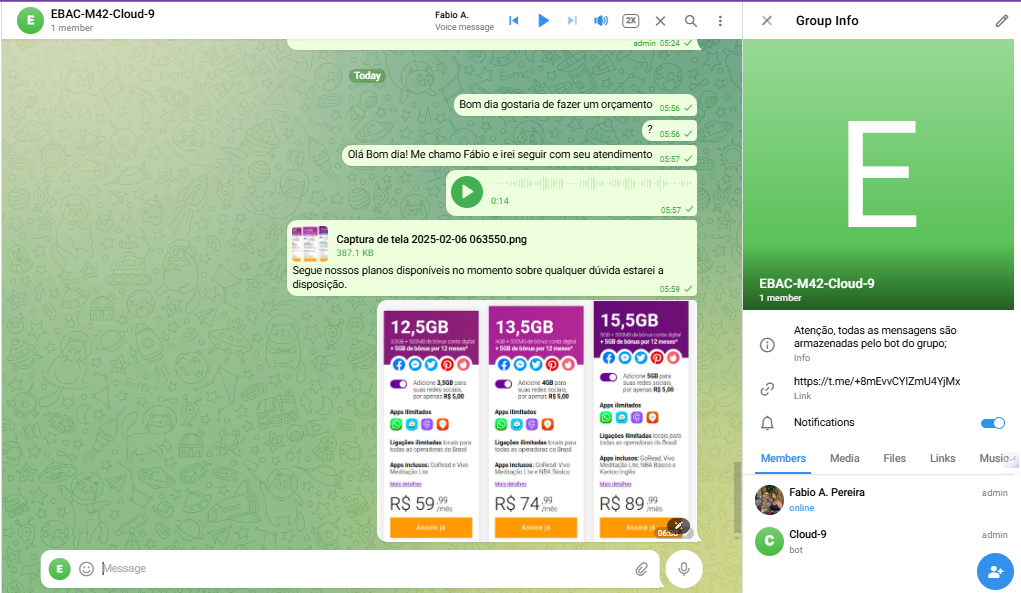

1.5.4.Foi desabilitado temporariamente para o teste a linha de  message = json.loads(event["Body"]) do código do lambda

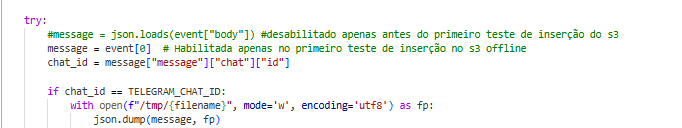

1.5.5.Confirmando se a mesma quantidade de dados inserida no Chat do telegram foi salva no S3 concluindo então com sucesso a primeira etapa com a integração de dados  crus extraídos do Telegram para o AWS S3

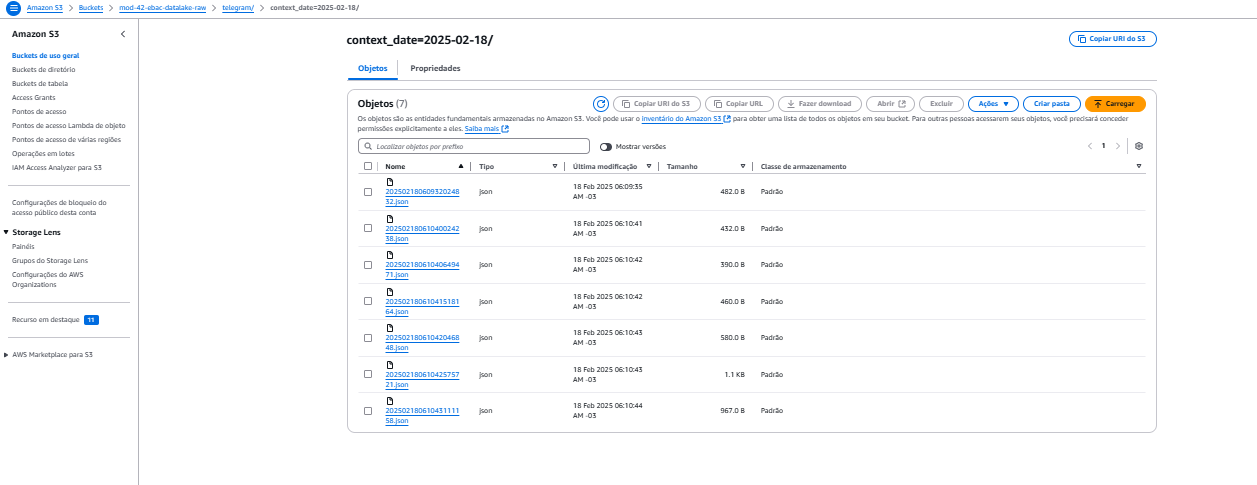

## 2\. ETL

## **2.1.AWS S3**

Replique as atividades da aula 2.

2.1.1.Nessa etapa criamos  um `bucket` no `AWS S3` para o armazenamento de dados enriquecidos, adicionando o sufixo `-enriched`como boa prática.

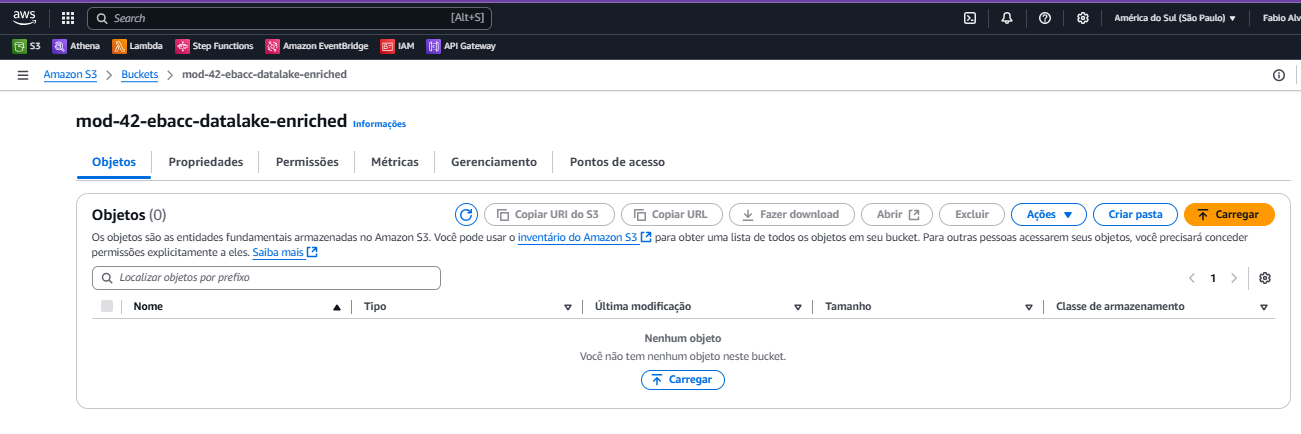

### **2.2. AWS Lambda**

Na etapa de **ETL**, o `AWS Lambda` tem a função de ativamente processar as mensagens captadas pelo *bot* do **Telegram**, persistidas na camada crua no *bucket* do `AWS S3`, e persisti-las na camada enriquecida, também em um *bucket* do `AWS S3`. Logo, vamos criar uma função que opera da seguinte forma:

2.2.1. Cria uma função no `AWS Lambda` para processar as mensagens JSON de uma única partição do dia anterior (D-1), armazenadas no *bucket* de dados crus. Salvando o resultado em um único arquivo PARQUET, também particionado por dia. Não se esquecendo de configurar as variáveis de ambiente, de adicionar a permissão de interação com `AWS S3` no `AWS IAM`, de configurar o *timeout* e de adicionar a *layer* com o código do pacote Python PyArrow.

 - Lista todos os arquivos JSON de uma única participação da camada crua de um *bucket* do `AWS S3`;
 - Para cada arquivo listado:
  - Faz o *download* do arquivo e carrega o conteúdo da mensagem;
  - Executa uma função de *data wrangling*;
  - Cria uma tabela do PyArrow e a contatena com as demais.
 - Persiste a tabela no formato Parquet na camada enriquecida em um *bucket* do `AWS S3`.

> **Nota**: O fato de utilizarmos duas camadas de armazenamento e processamento, permite que possamos reprocessar os dados crus de diversas maneiras, quantas vezes forem preciso.

> **Nota**: Para testar a função, substitua o código `date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')` por `date = (datetime.now(tzinfo) - timedelta(days=0)).strftime('%Y-%m-%d')`, permitindo assim o processamento de mensagens de um mesmo dia.

**Criando a Função no AWS lambda**

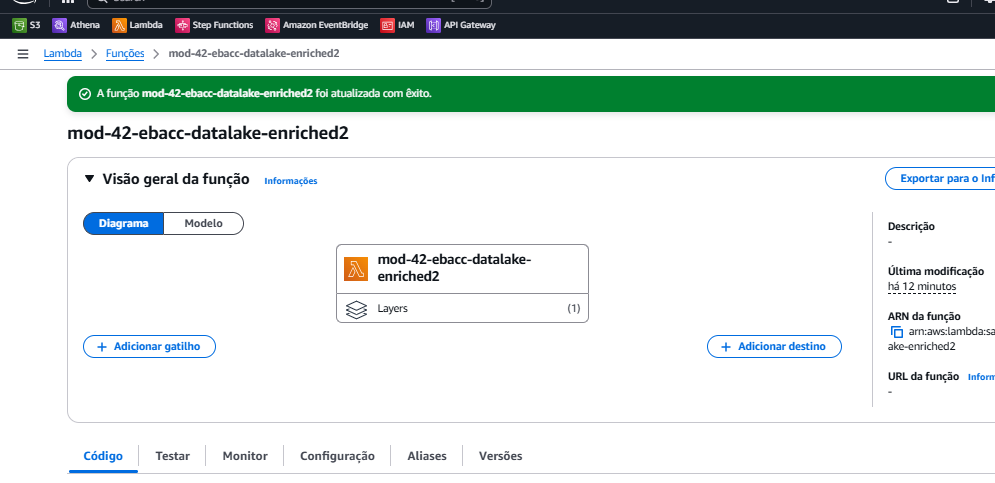

**Criando a função Lambda e inserindo código de configuração abaixo:**

In [ ]:
import os
import json
import logging
from datetime import datetime, timedelta, timezone

import boto3
import pyarrow as pa
import pyarrow.parquet as pq


def lambda_handler(event: dict, context: dict) -> bool:

  '''
  Diariamente é executado para compactar as diversas mensagensm, no formato
  JSON, do dia anterior, armazenadas no bucket de dados cru, em um único
  arquivo no formato PARQUET, armazenando-o no bucket de dados enriquecidos
  '''

  # variaveis de ambiente

  RAW_BUCKET = os.environ['AWS_S3_BUCKET']
  ENRICHED_BUCKET = os.environ['AWS_S3_ENRICHED']

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  # código principal

  table = None
  client = boto3.client('s3')

  try:

      response = client.list_objects_v2(Bucket=RAW_BUCKET, Prefix=f'telegram/context_date={date}')

      for content in response['Contents']:

        key = content['Key']
        client.download_file(RAW_BUCKET, key, f"/tmp/{key.split('/')[-1]}")

        with open(f"/tmp/{key.split('/')[-1]}", mode='r', encoding='utf8') as fp:

          data = json.load(fp)
          data = data["message"]

        parsed_data = parse_data(data=data)
        iter_table = pa.Table.from_pydict(mapping=parsed_data)

        if table:

          table = pa.concat_tables([table, iter_table])

        else:

          table = iter_table
          iter_table = None

      pq.write_table(table=table, where=f'/tmp/{timestamp}.parquet')
      client.upload_file(f"/tmp/{timestamp}.parquet", ENRICHED_BUCKET, f"telegram/context_date={date}/{timestamp}.parquet")

      return True

  except Exception as exc:
      logging.error(msg=exc)
      return False

**O código da função de data wrangling:**

In [ ]:
def parse_data(data: dict) -> dict:

  date = datetime.now().strftime('%Y-%m-%d')
  timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

  parsed_data = dict()

  for key, value in data.items():

      if key == 'from':
          for k, v in data[key].items():
              if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key == 'chat':
          for k, v in data[key].items():
              if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key in ['message_id', 'date', 'text']:
          parsed_data[key] = [value]

  if not 'text' in parsed_data.keys():

    parsed_data['text'] = [None]

  return parsed_data

**Preparando ambiente antes de  teste de código,ao inserir o código fazer o Deploy e seguir com configurações antes do teste.**

**Obs: Devemos alterar o código para teste no dia e no final normalizar na parte de variáveis lógicas**

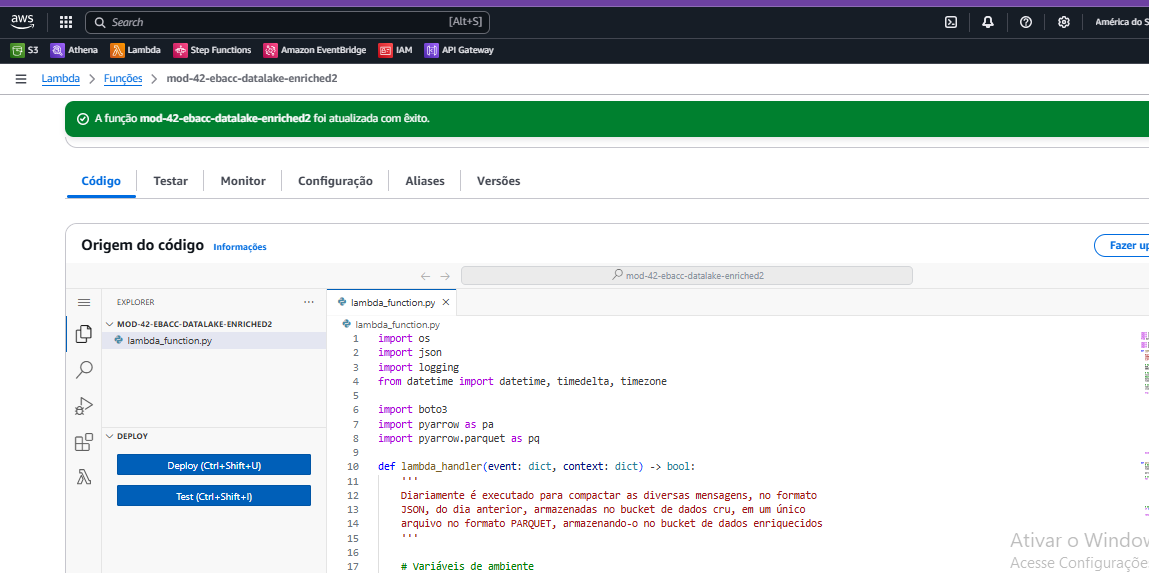

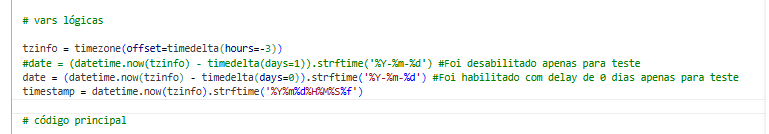

Para que a função funcione corretamente, algumas configurações precisam ser realizadas.

Note que o código exige a configuração de duas variáveis de ambiente: `AWS_S3_BUCKET` e `AWS_S3_ENRICHED` com os nomes dos *bucket* do `AWS S3` da camada cru e enriquecida, respectivamente.

 - **Variáveis de ambiente**

**Definindo e Configurando variáveis de ambiente no Lambda antes de teste**

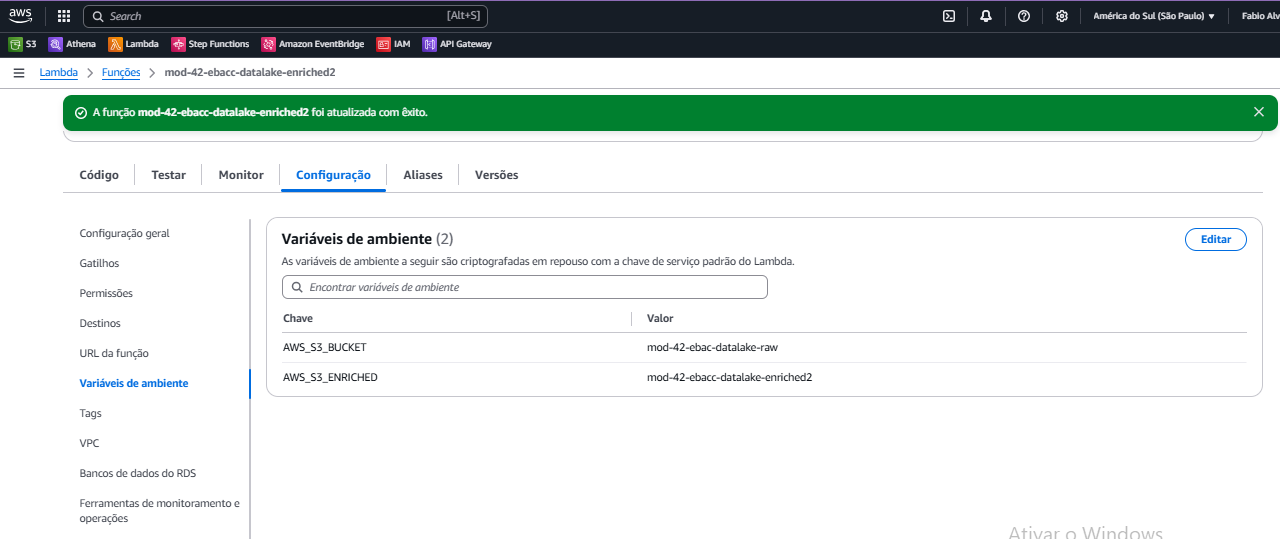

 - **Permissão**

 Precisamos adicionar a permissão de escrita nos *buckets* do `AWS S3` para a função do `AWS Lambda` no `AWS IAM`.

**Definindo e adicionando política de  permissões para que essas variáveis possam interagir com os Buckets do S3 estabelecidos em valor, sendo direcionado através do Lambda para o AWS IAM**

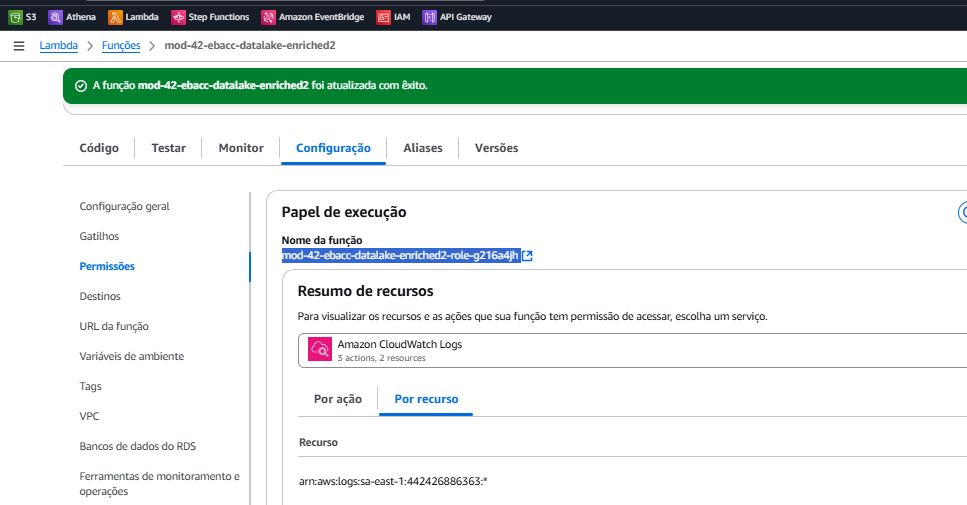

**Politicas de permissões  adicionadas pelo IAM conforme visualizado abaixo**

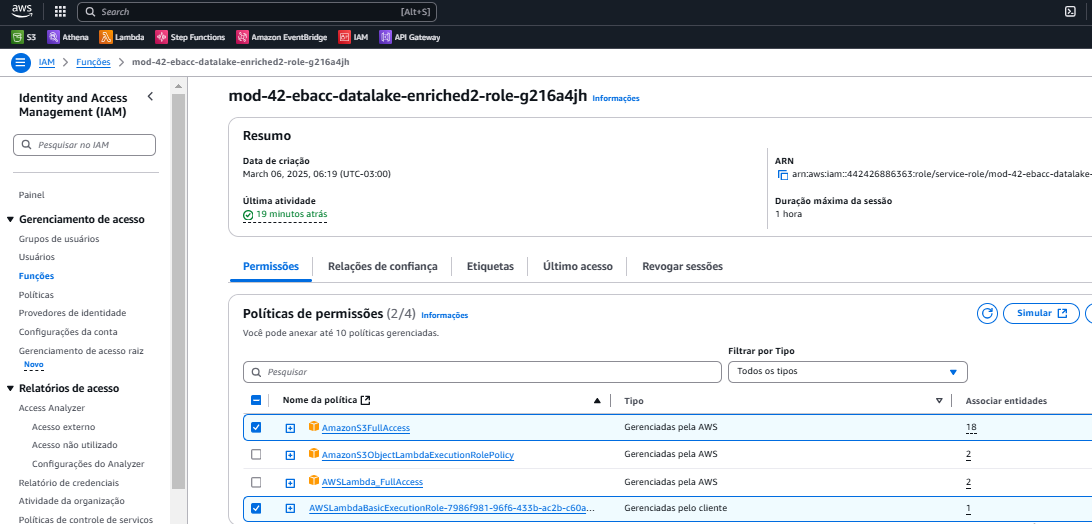

 - **Recursos**

 O timeout padrão de funcões do AWS Lambda é de 3 segundos(tempo de execução). Para a função, vamos aumentar o tempo para 5 minutos, principalmente para lidar com o IO (input/output) de arquivos do AWS S3.

**Ajustamos o time de execução para 5 minutos para permitir a interação de leitura e escrita sem que haja falhas também foi alterada a memória com mesmo objetivo**

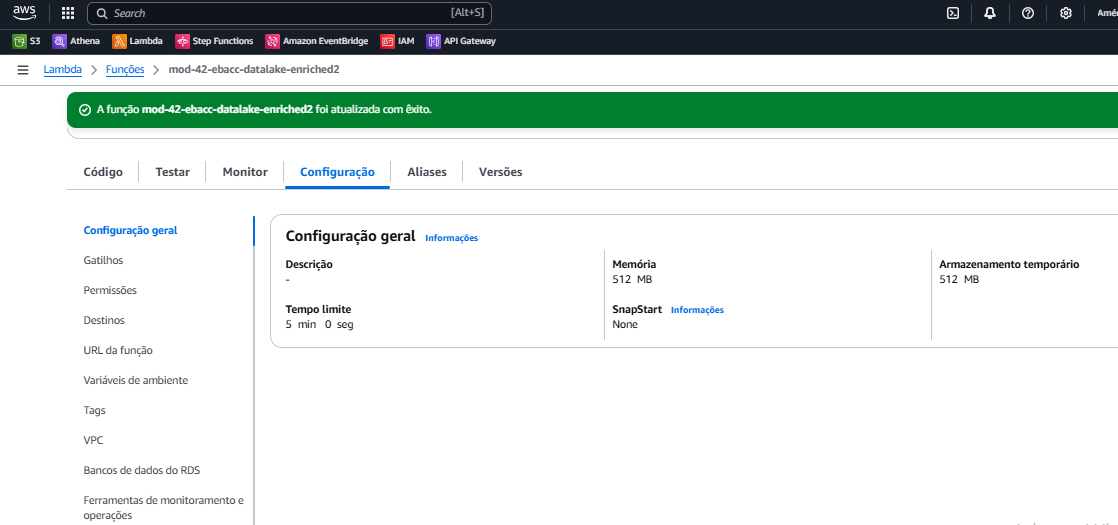

 - **Camadas**

 Por fim, note que o código da função utiliza o pacote Python PyArrow. Contudo, o ambiente padrão do `AWS Lambda` possui poucos pacotes externos instalado, como o pacote Python boto3, logo o PyArrow não será encontrado e a execução da função falhará. Existem algumas formas de adicionar pacotes externos no ambiente de execução do AWS Lambda, um deles é a criação de camadas ou *layers*, onde podemos fazer o *upload* dos pacotes Python direto na plataforma ou através de um *bucket* do `AWS S3`. Vamos então seguir com a última opção, onde teremos que:

**Adiante seguimos com os devidos passos:**

 - Criar um *bucket* no `AWS S3`;
 - Fazer o *upload* do código do pacote Python do PyArrow (*download* neste [link](https://github.com/awslabs/aws-data-wrangler/releases));
 - Criar *layer* e conectar na função.

**Criando Bucket no AWS S3**

**Depois de fazer Download do github foi feito upload do arquivo no Bucket S3 LAYER2 criado**

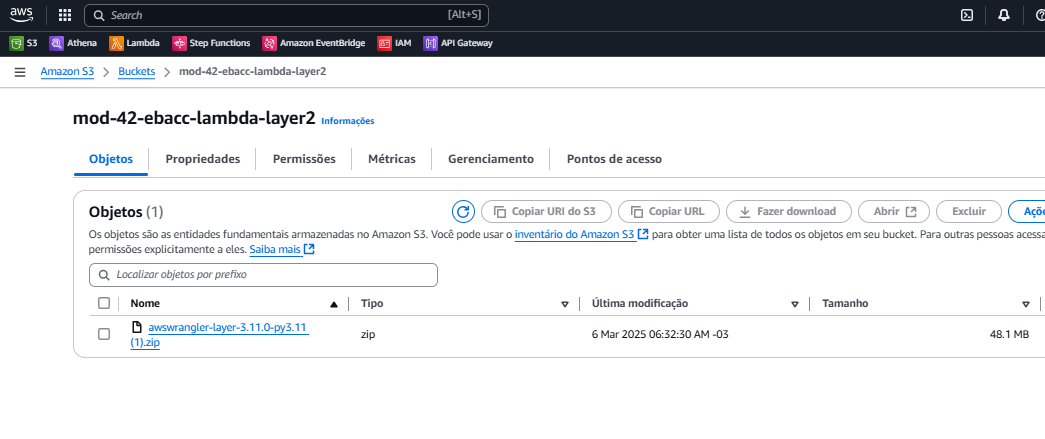

 -Em seguida devemos **Fazer o *upload* do código do pacote Python do PyArrow (*download* neste [link](https://github.com/awslabs/aws-data-wrangler/releases));**No caso escolhi baixar o arquivo `awswrangler-layer-3.11.0-py3.11.zip`
de acordo com a versão atual do python usado no colab.

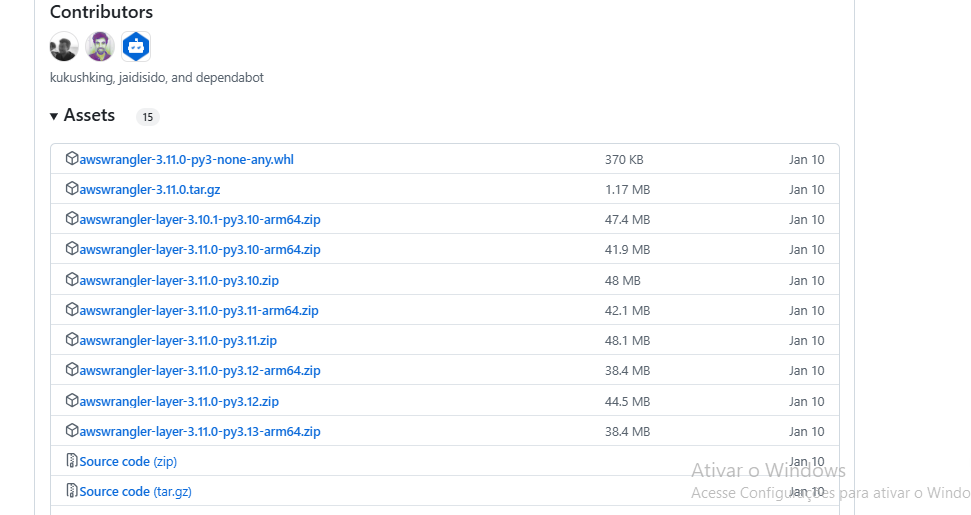

**Em seguida voltamos para o Lambda e criamos a layer em camadas dentro da aba código**

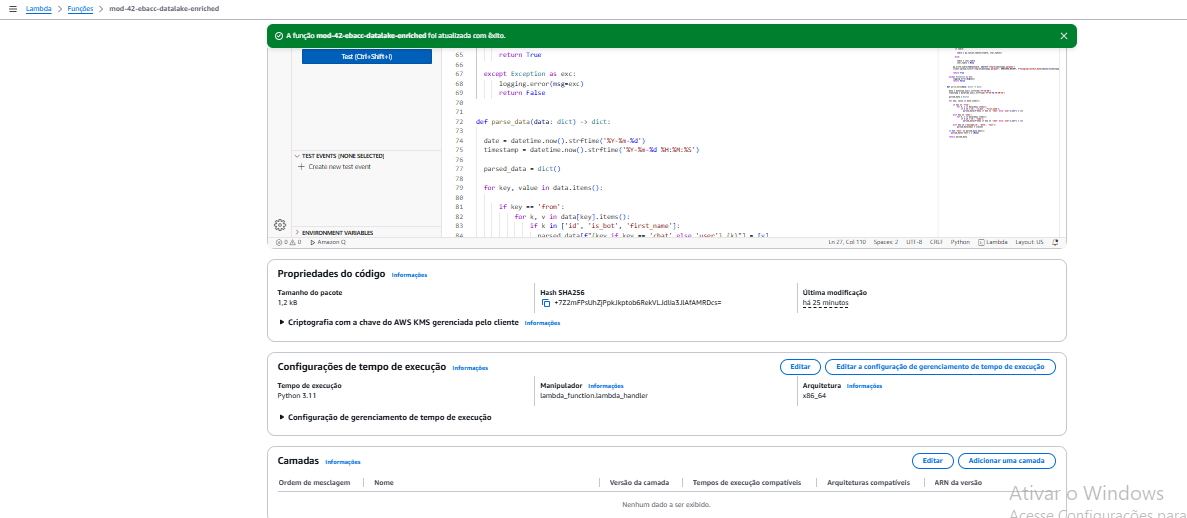

**Criando camada e conexão de arquivo no lambda**

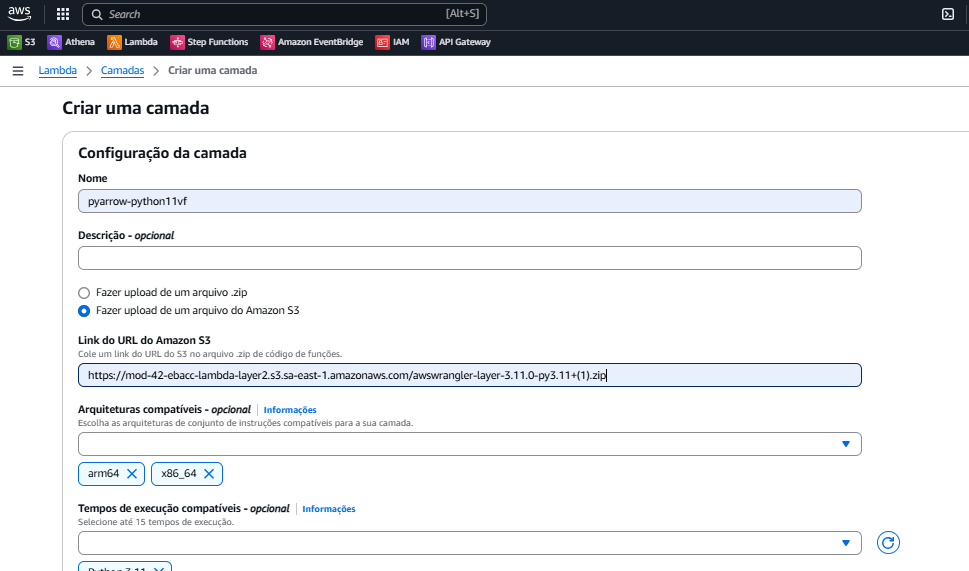

**Camada criada com Êxito**

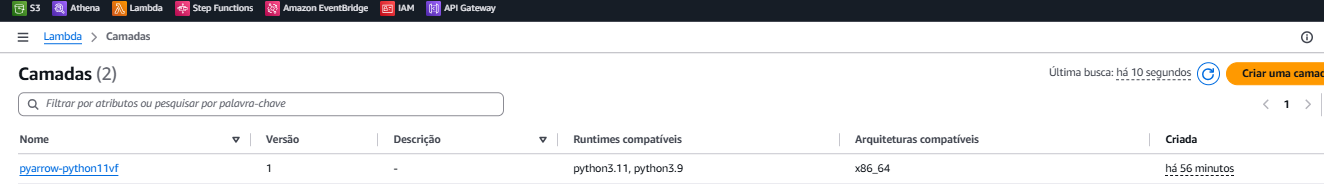

**Depois desse passo voltamos para a função  Enriched2 para adionar a camada criada**

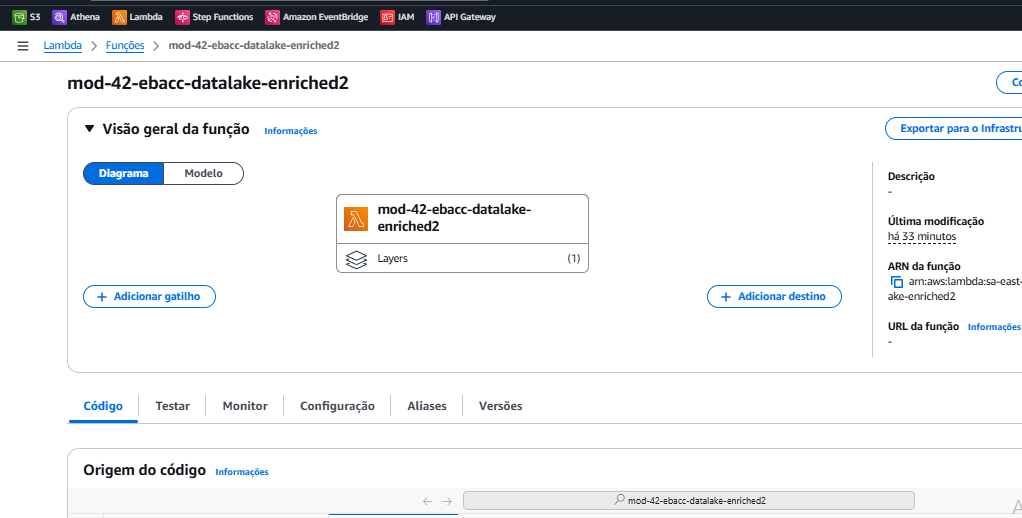

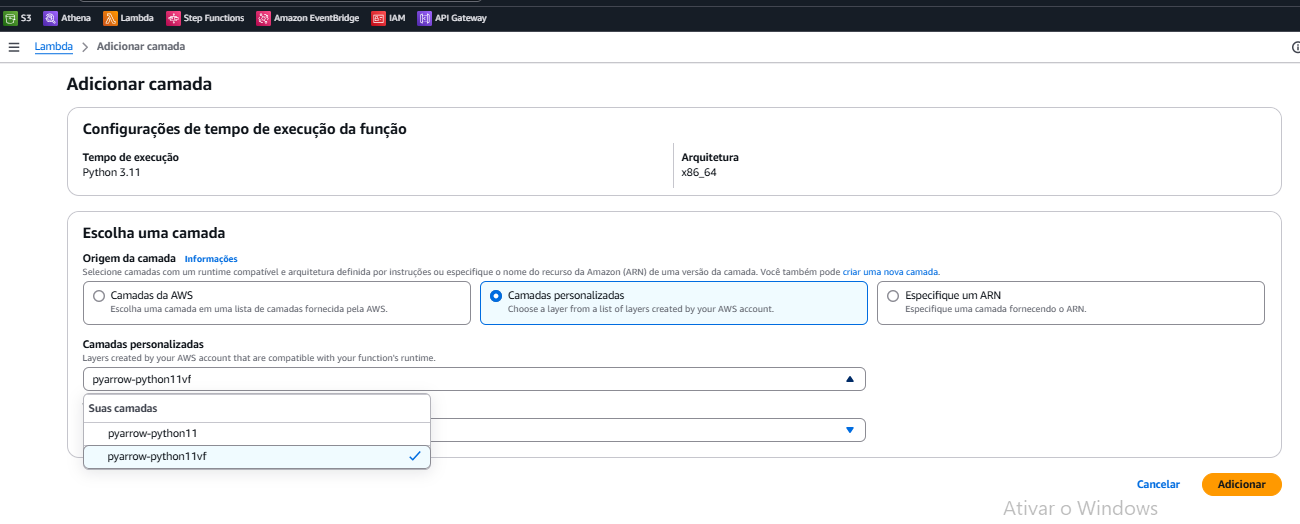

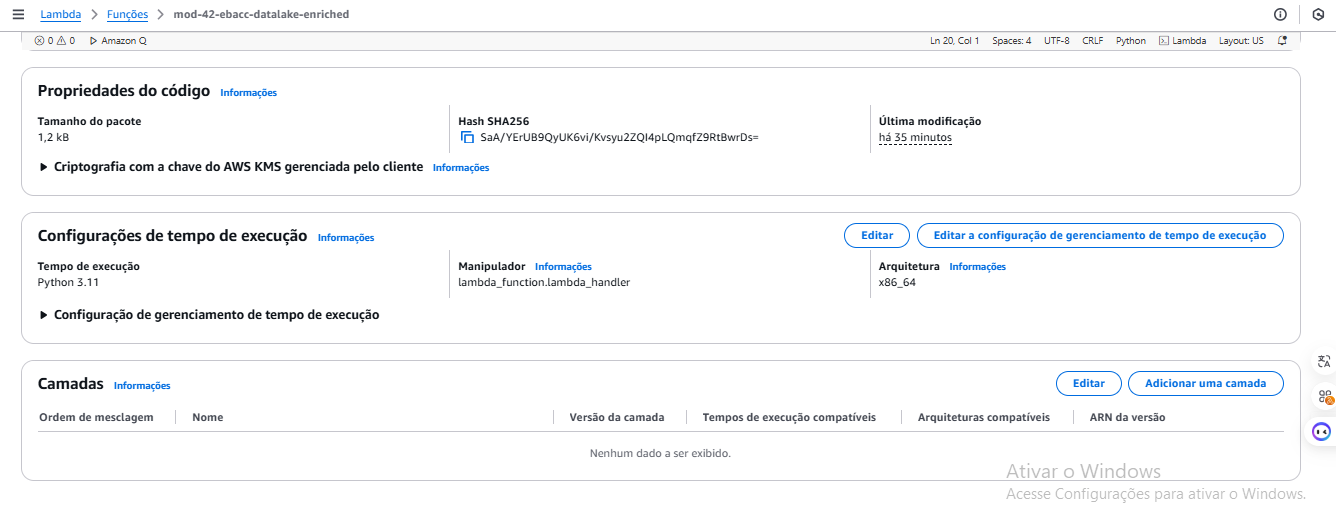

**Veja que agora foi acrescentada a camada Layers no bucket se clicar em cima verá os detalhes da camada**

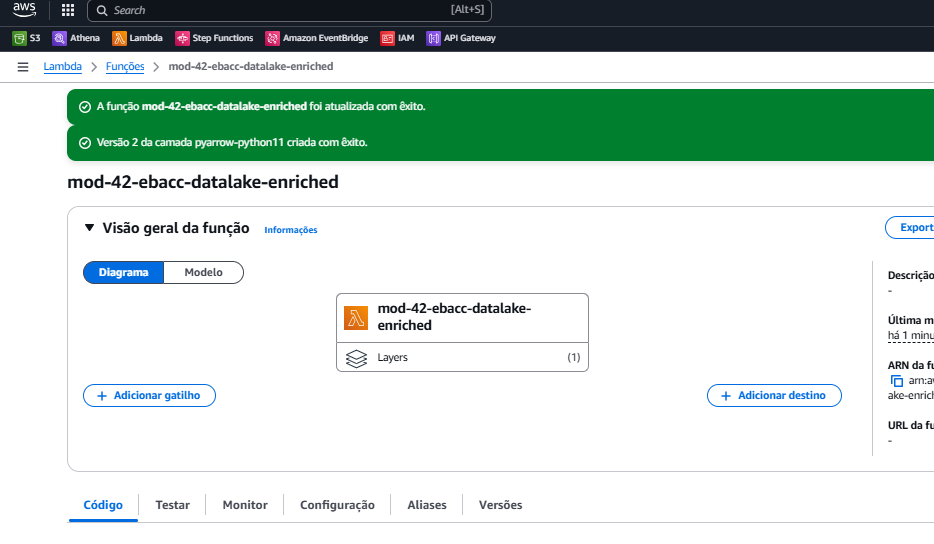

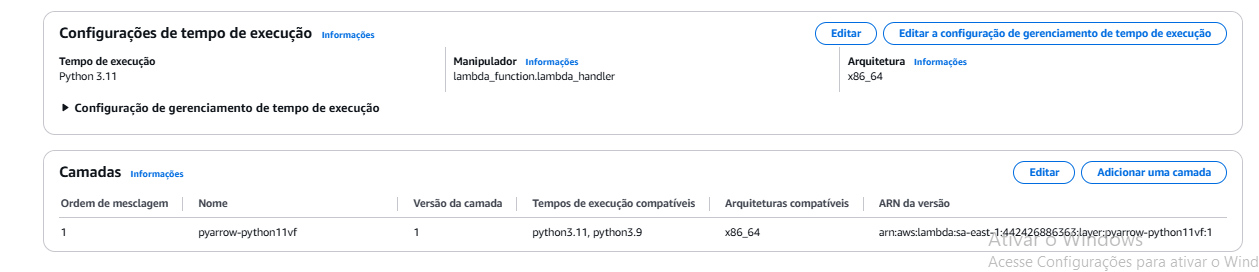

**Na etapa seguinte finalmente faremos o teste, será criado um novo evento e feito teste lembrando que após finalizar é necessário  normalizar condição de atraso para 1 dia que agora está configurada no código para o momento tanto no lambda RAW como no ENRICHED2.**

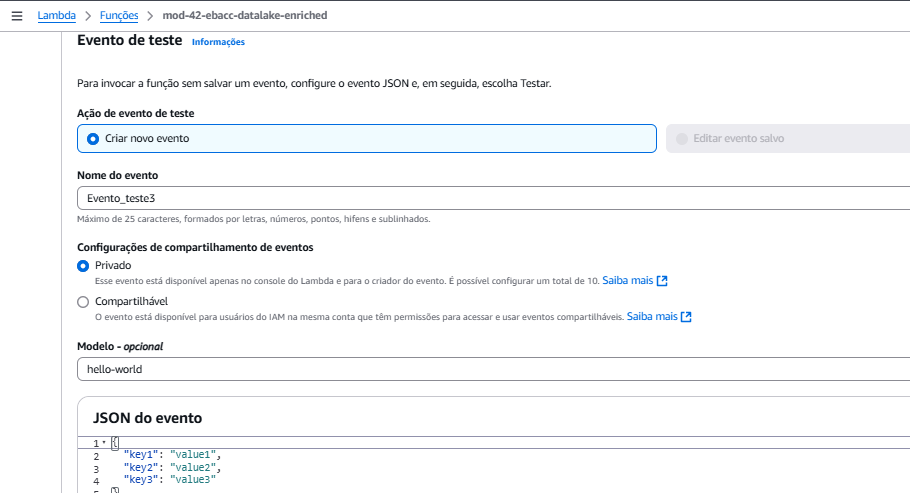

**Teste executado com êxito**



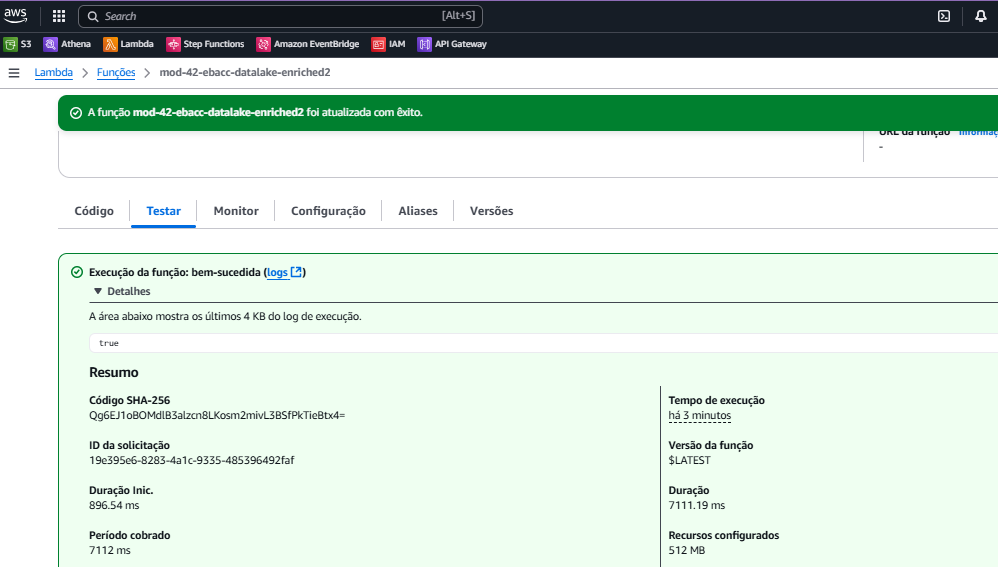

**Verificando se o arquivo foi devidadmente carregado em formato parquet no bucket ENRICHED2**

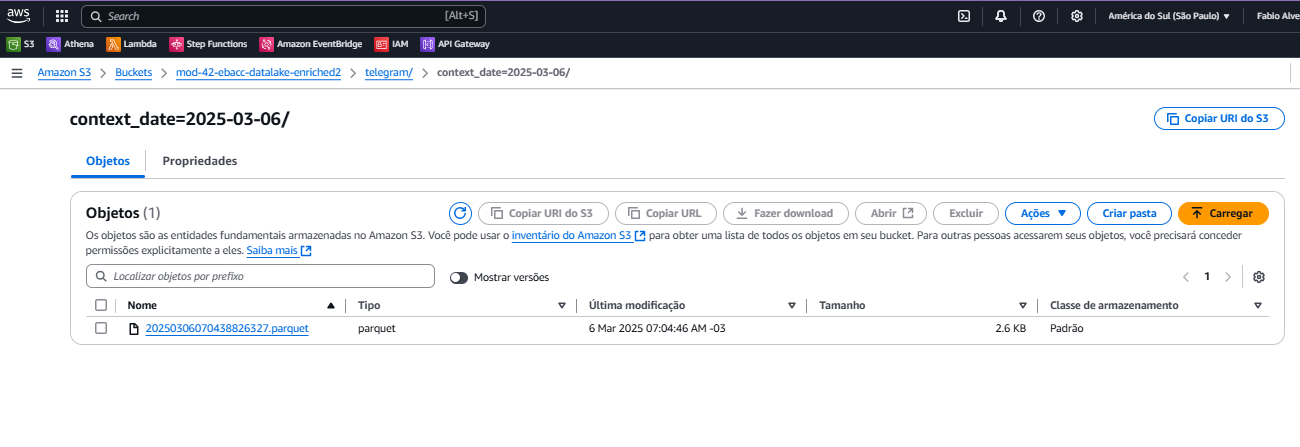

**Para concluir essa etapa voltamos para o código lambda e alteramos o time de exportação**

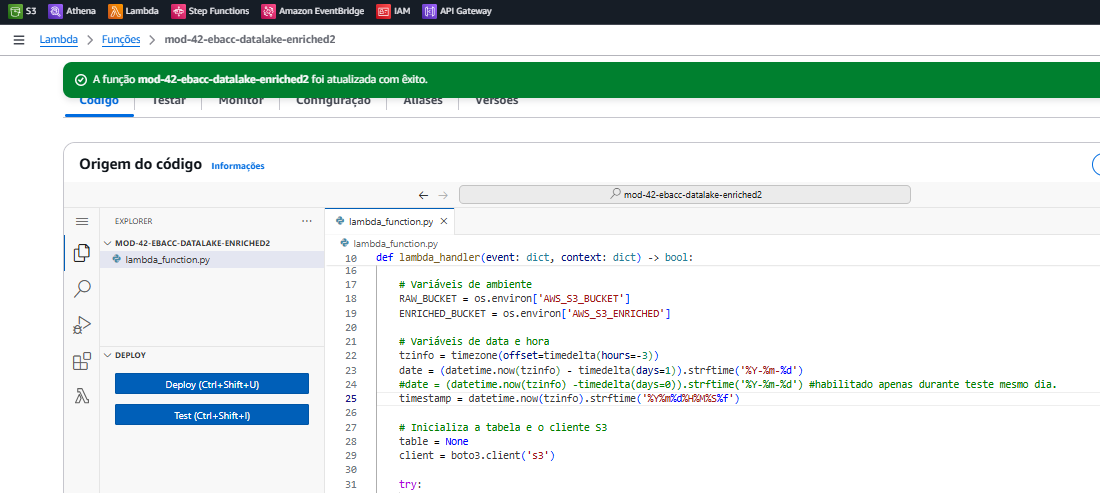

### **2.3. AWS Event Bridge**











2.3.1. Crie uma regra no `AWS Event Bridge` para executar a função do `AWS Lambda` todo dia a meia noite no horário de Brasília (GMT-3).

**Na amazon entra na aba criar regras do Event Bridge seguimos configuração conforme imagem abaixo no fim clica em continuar**

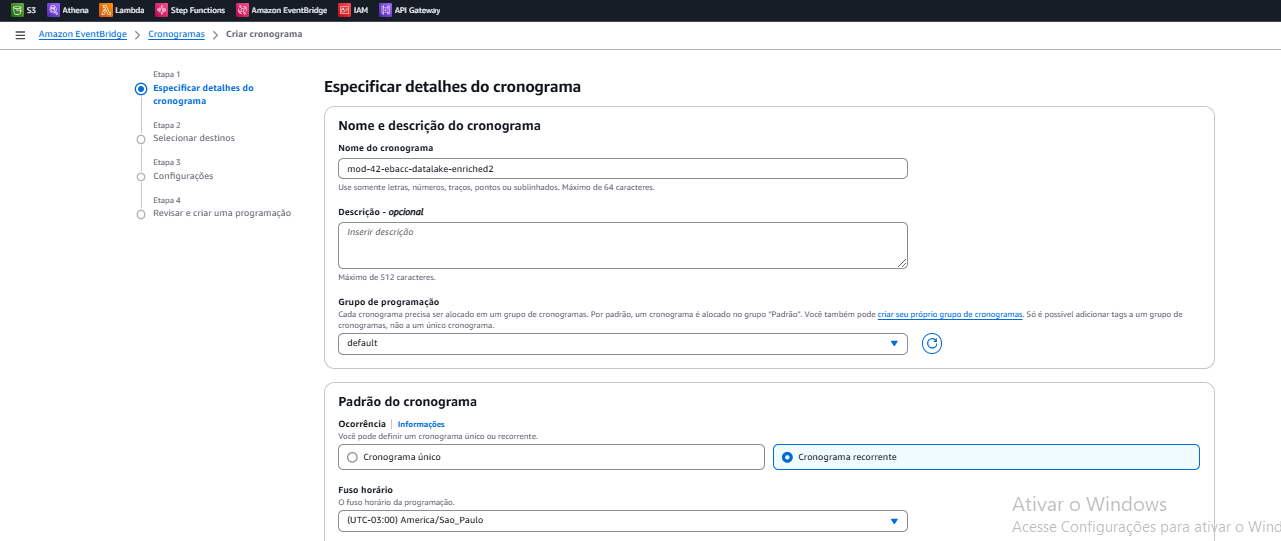

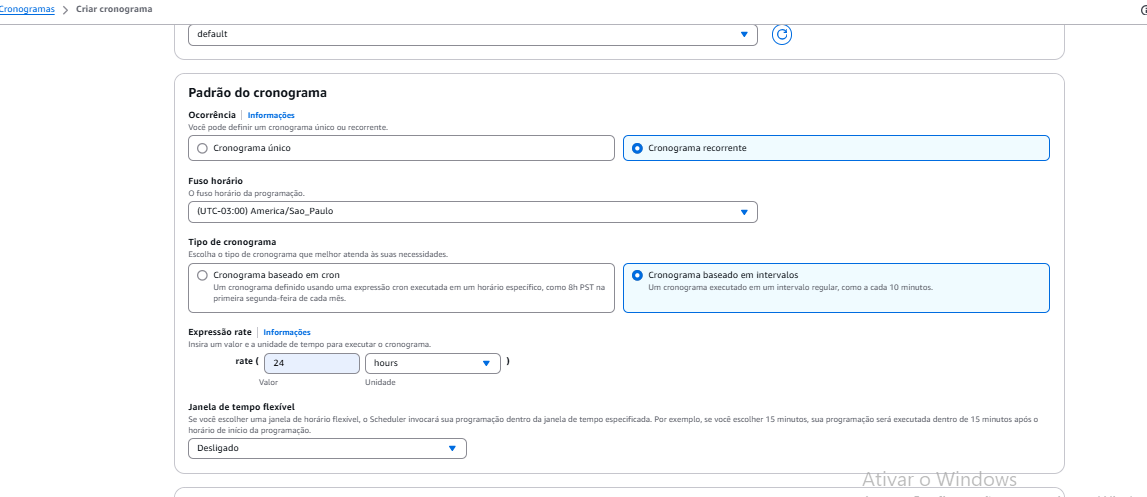

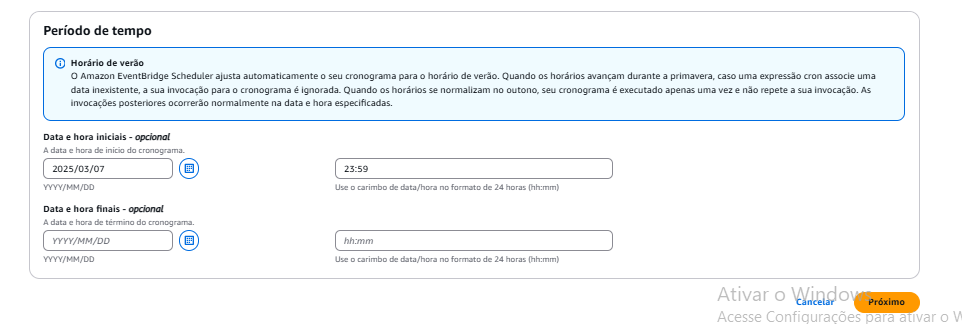

**Aqui selecionamos o destino criado no caso a função lambda**

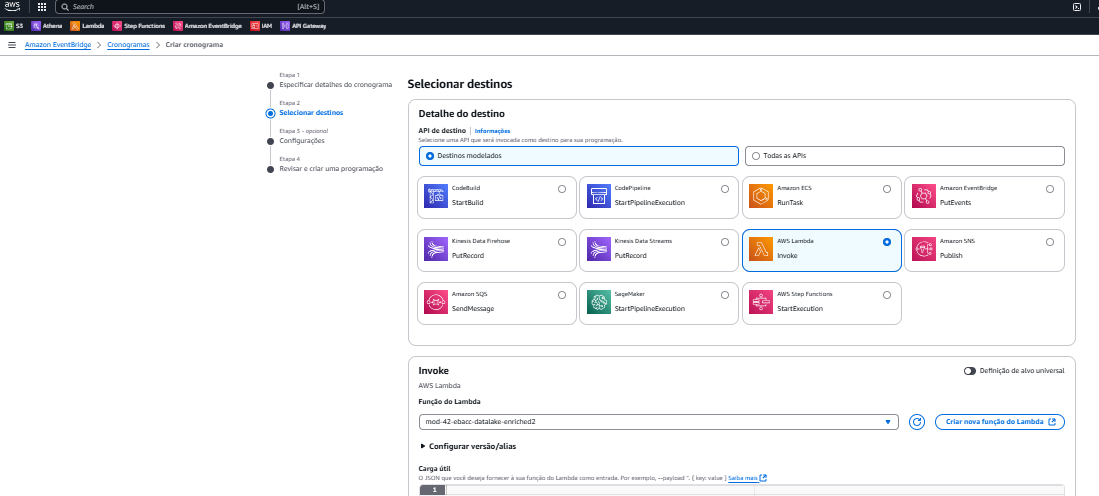

**Feita revisão antes de criar programação e avançando**

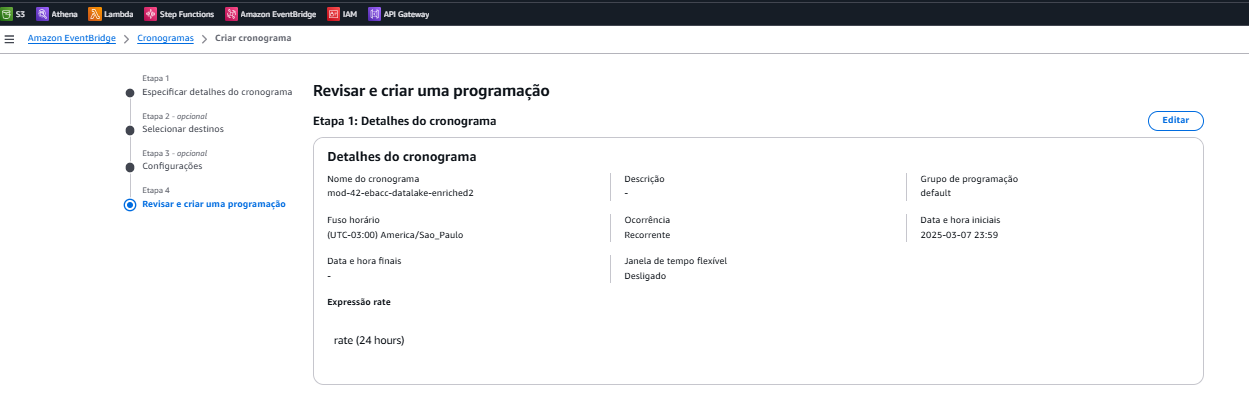

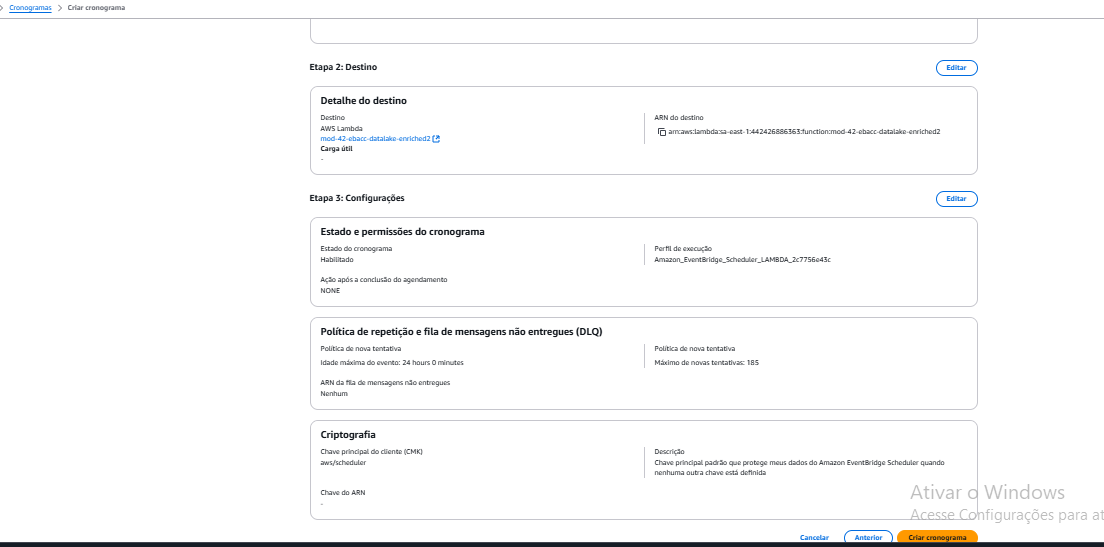

**Abaixo foi criado o cronograma e finalizado essa etapa**

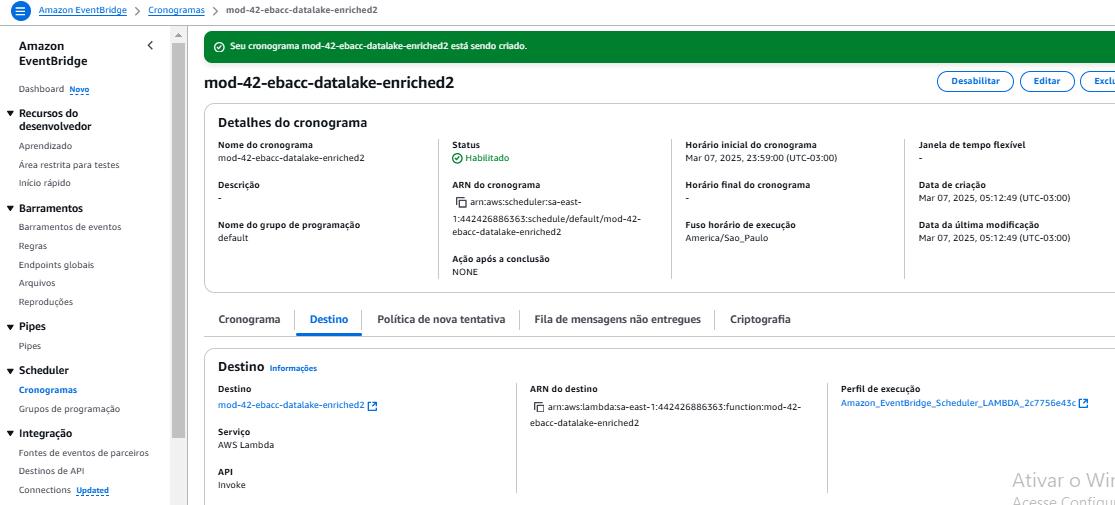

## 3\. Apresentação

Replique as atividades da aula 3.

### **3.1. AWS Athena**

3.1.1.Foi utilizado nessa etapa de apresentação, o  AWS Athena que tem a função de entregar o dados através de uma interface SQL para os usuários do sistema analítico. Para criar a interface, basta criar uma tabela externa sobre o dado armazenado na camada mais refinada da arquitetura, a camada enriquecida.

**Nessa etapa foi criado a tabela no `AWS Athena` com código abaixo que aponta para os dados armazenados no bucket enriquecido do `AWS S3`.**

**Antes de criar a tabela no `AWS Athena`será copiado o endereço do bucket enriched2 com o caminho conforme imagem abaixo para inserir no código do Athena** **em `copiar URI do S3`**

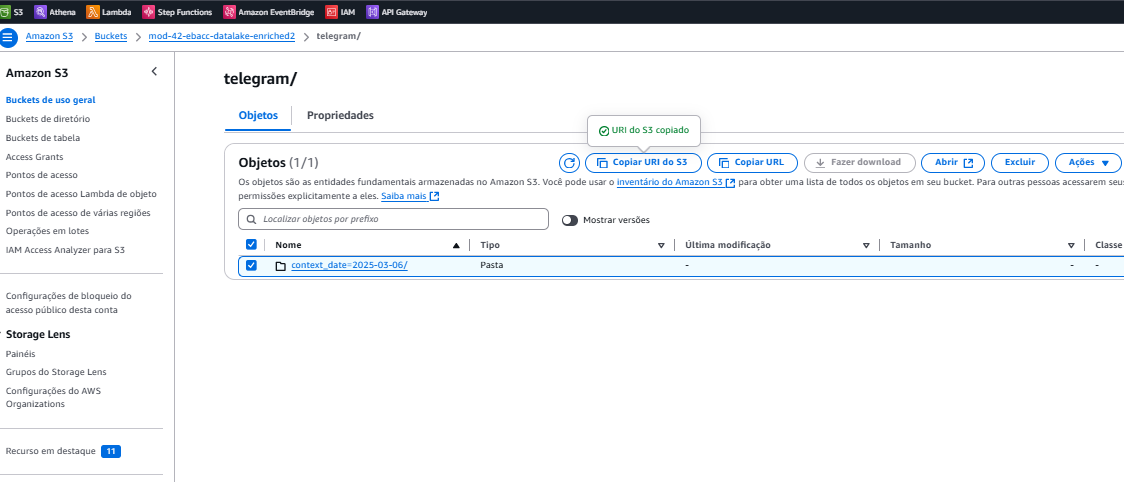



```
CREATE EXTERNAL TABLE IF NOT EXISTS telegram(
  message_id BIGINT,
  user_id BIGINT,
  user_is_bot BOOLEAN,
  user_first_name STRING,
  chat_id BIGINT,
  chat_type STRING,
  text STRING,
  date BIGINT
)
PARTITIONED BY (
  context_date DATE
)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://mod-42-ebacc-datalake-enriched2/telegram/'

```



**No `AWS Athena` adicionamos o bucket enriquecido dentro do código antes de criar a tabela**

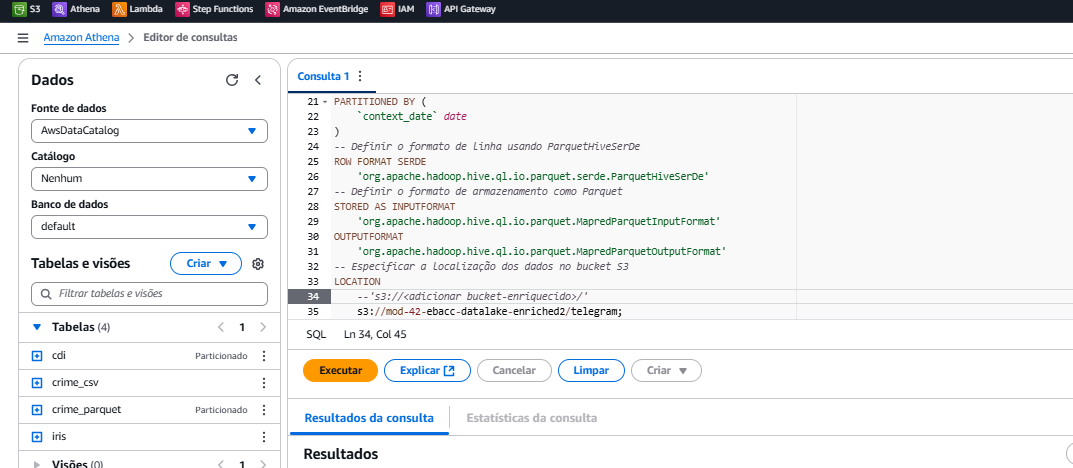

**Em seguida foi criada a tabela com nome de telegram**

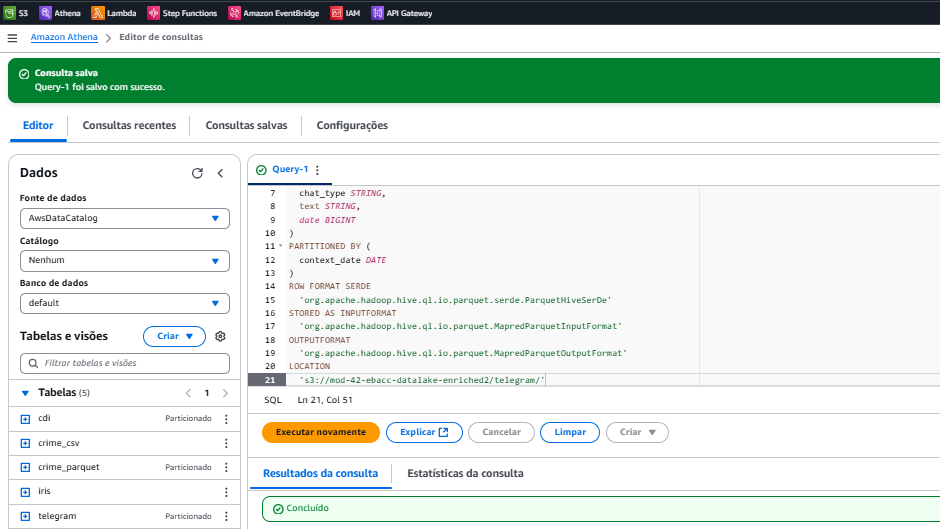

**3.1.2. Executando o comando `MSCK REPAIR TABLE <nome-tabela>` para carregar as partições.

**OBS.: O Athena não carrega a  partição automaticamente nesse caso,esse é um processo manual conforme necessidade.No projeto cada partição equivale a dados de 1 dia.**

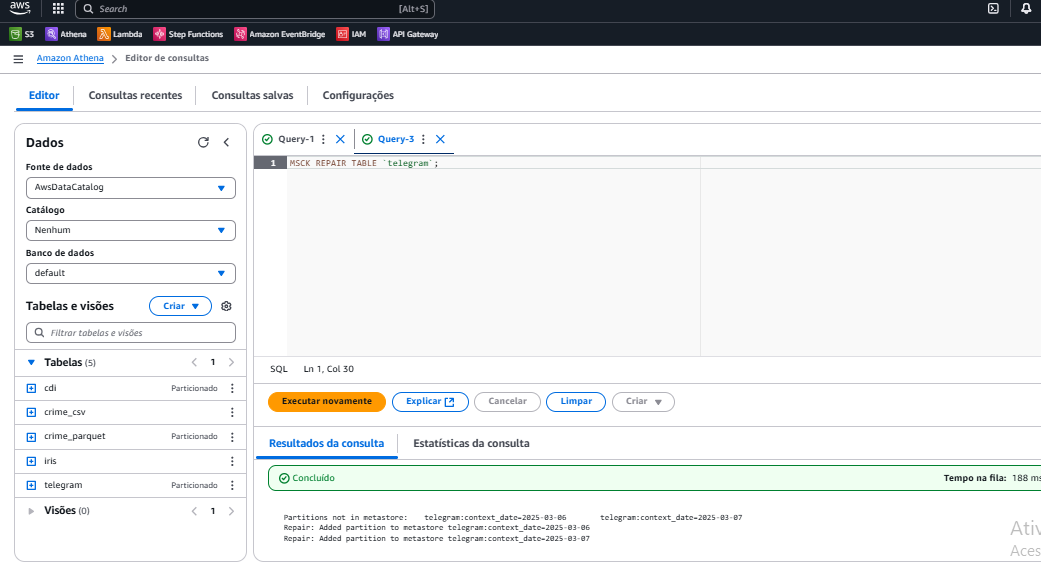

Agora todo trabalho de infraestrutura foi realizado com sucesso ,nesse caso toda mensagem  que chegue no grupo do telegram irá ser exportada, tratada e carregada na tabela pelo processo de ingestão o lambda sendo executado sendo parte desse processo .

3.1.3. Executando as consultas SQL para explorar os dados.:




**Query-1:**Segmentação por Plano de Internet

**Objetivo:**Esta consulta conta o número de mensagens que mencionam cada tipo de plano de internet, ajudando a identificar quais planos são mais populares entre os usuários.



```
# SELECT
    CASE
        WHEN text LIKE '%plano de 12,5GB%' THEN '12,5GB por R$59,99'
        WHEN text LIKE '%plano de 13,5GB%' THEN '13,5GB por R$74,99'
        WHEN text LIKE '%plano de 15,5GB%' THEN '15,5GB por R$89,99'
        ELSE 'Outro'
    END AS plano_internet,
    COUNT(*) AS qtd_mensagens
FROM telegram
GROUP BY
    CASE
        WHEN text LIKE '%plano de 12,5GB%' THEN '12,5GB por R$59,99'
        WHEN text LIKE '%plano de 13,5GB%' THEN '13,5GB por R$74,99'
        WHEN text LIKE '%plano de 15,5GB%' THEN '15,5GB por R$89,99'
        ELSE 'Outro'
    END
ORDER BY qtd_mensagens DESC;
```



<h4> Tabela no AWS Athena</h4>

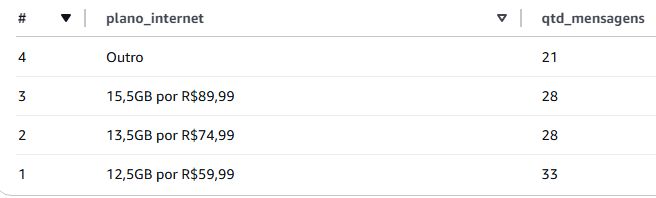

**Query-2:**Horários de Pico de Interesse

**Objetivo:**Esta consulta analisa os horários em que os usuários mencionam interesse em planos de internet, permitindo identificar os melhores momentos para campanhas de marketing.


```
# WITH parsed_date_cte AS (
    SELECT *,
           from_unixtime(date) AS parsed_date
    FROM telegram
)
SELECT
    extract(hour from parsed_date) AS hora_do_dia,
    COUNT(*) AS qtd_mensagens
FROM parsed_date_cte
WHERE text LIKE '%plano%'
GROUP BY extract(hour from parsed_date)
ORDER BY qtd_mensagens DESC;
```



<h4> Tabela no AWS Athena</h4>

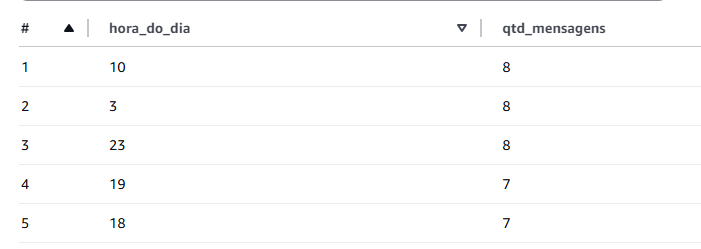

**Query-3:**Dias de Maior Atividade

**Objetivo**:Esta consulta conta o número de mensagens enviadas em cada dia da semana, ajudando a identificar os dias de maior atividade dos usuários e planejando campanhas de acordo.



```
# WITH parsed_date_cte AS (
    SELECT *,
           from_unixtime(date) AS parsed_date
    FROM telegram
)
SELECT
    day_of_week(parsed_date) AS dia_da_semana,
    COUNT(*) AS qtd_mensagens
FROM parsed_date_cte
GROUP BY day_of_week(parsed_date)
ORDER BY qtd_mensagens DESC;

```



<h4> Tabela no AWS Athena</h4>

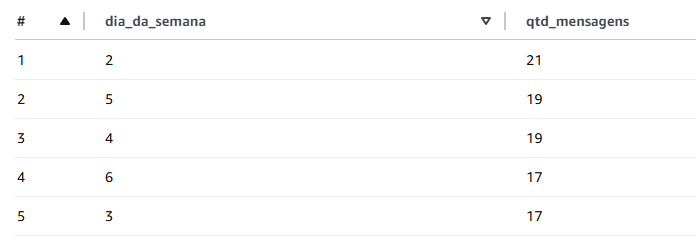

**Query-4:** Engajamento por Usuário

**Objetivo**:
Esta consulta identifica os usuários mais engajados, permitindo ações de marketing direcionadas a esses usuários para aumentar ainda mais o engajamento e a fidelidade



```
# SELECT user_first_name, COUNT(*) AS qtd_mensagens
FROM telegram
GROUP BY user_first_name
ORDER BY qtd_mensagens DESC
LIMIT 10;

```



<h4> Tabela no AWS Athena</h4>

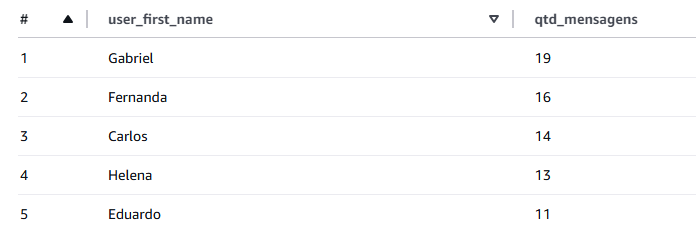

**Query-5:** Mensagens por Tipo de Plano e Hora do Dia

**Objetivo:**
Esta consulta combina a análise de interesse por tipo de plano de internet com a hora do dia, ajudando a entender quando os usuários estão mais propensos a discutir sobre planos específicos.



```
# WITH parsed_date_cte AS (
    SELECT *,
           from_unixtime(date) AS parsed_date
    FROM telegram
)
SELECT
    CASE
        WHEN text LIKE '%plano de 12,5GB%' THEN '12,5GB por R$59,99'
        WHEN text LIKE '%plano de 13,5GB%' THEN '13,5GB por R$74,99'
        WHEN text LIKE '%plano de 15,5GB%' THEN '15,5GB por R$89,99'
        ELSE 'Outro'
    END AS plano_internet,
    extract(hour from parsed_date) AS hora_do_dia,
    COUNT(*) AS qtd_mensagens
FROM parsed_date_cte
WHERE text LIKE '%plano%'
GROUP BY
    CASE
        WHEN text LIKE '%plano de 12,5GB%' THEN '12,5GB por R$59,99'
        WHEN text LIKE '%plano de 13,5GB%' THEN '13,5GB por R$74,99'
        WHEN text LIKE '%plano de 15,5GB%' THEN '15,5GB por R$89,99'
        ELSE 'Outro'
    END,
    extract(hour from parsed_date)
ORDER BY qtd_mensagens DESC;
```



<h4> Tabela no AWS Athena</h4>

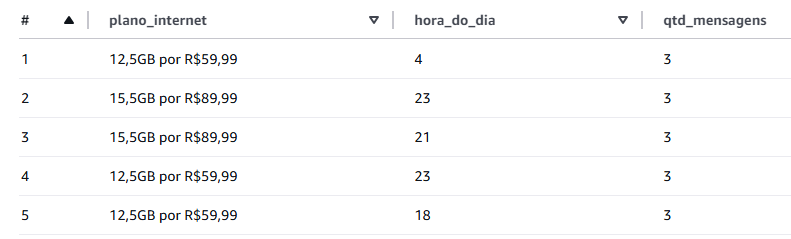

**Query-6:** Mensagens Negativas e Positivas

**Objetivo:**Esta consulta classifica as mensagens dos usuários como positivas ou negativas com base em palavras-chave, ajudando a entender melhor a percepção dos usuários sobre os planos de internet.



```
# SELECT
    CASE
        WHEN text LIKE '%interessado%' OR text LIKE '%gostaria%' THEN 'Positiva'
        WHEN text LIKE '%diferença%' OR text LIKE '%desconto%' THEN 'Neutra'
        ELSE 'Negativa'
    END AS sentimento,
    COUNT(*) AS qtd_mensagens
FROM telegram
GROUP BY
    CASE
        WHEN text LIKE '%interessado%' OR text LIKE '%gostaria%' THEN 'Positiva'
        WHEN text LIKE '%diferença%' OR text LIKE '%desconto%' THEN 'Neutra'
        ELSE 'Negativa'
    END
ORDER BY qtd_mensagens DESC;

```



<h4> Tabela no AWS Athena</h4>

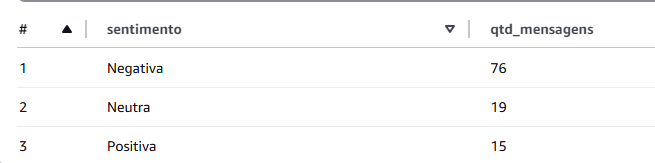

**Query-7:** Análise de Retenção de Usuários

**Objetivo:**Esta consulta identifica a frequência com que os mesmos usuários mencionam planos de internet, ajudando a analisar a retenção de clientes.



```
# SELECT
    user_first_name,
    COUNT(DISTINCT DATE(FROM_UNIXTIME(date))) AS dias_ativos
FROM
    telegram
WHERE
    text LIKE '%plano%'
GROUP BY
    user_first_name
ORDER BY
    dias_ativos DESC;

```



<h4> Tabela no AWS Athena</h4>

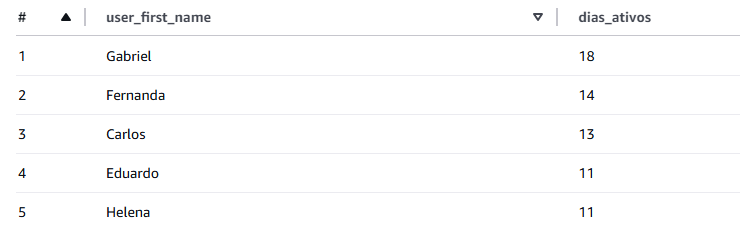

**Query-8:** Mensagens mais frequentes no chat

**Objetivo:**Essa consulta busca entender padrões de comportamento, interesses e linguagens comuns entre os usuários.



```
# SELECT
    text AS mensagem,
    COUNT(*) AS frequencia
FROM
    telegram
GROUP BY
    text
ORDER BY
    frequencia DESC
LIMIT 10;

```



<h4> Tabela no AWS Athena</h4>

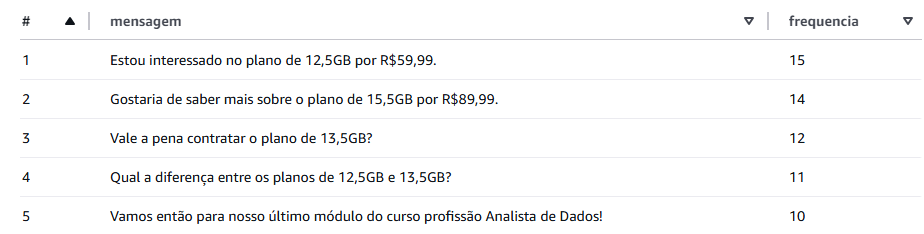

## 4\. Storytelling

Siga as dicas da aula 4 para expor o seu projeto.

<h1>Data Pipeline | AWS - Telegram</h1>

<h2>Índice</h2>
<ol>
    <li><a href="#introducao">Introdução</a></li>
    <li><a href="#sistema-transacional">Sistema Transacional</a>
        <ul>
            <li><a href="#ingestao-de-dados">Ingestão de Dados</a></li>
            <li><a href="#apis">APIs</a></li>
            <li><a href="#criação-chatbot-telegram">Criação de Chatbot no Telegram</a></li>
            <li><a href="#aws-api-gateway">AWS API Gateway</a></li>
        </ul>
    </li>
    <li><a href="#sistema-analitico">Sistema Analítico</a>
        <ul>
            <li><a href="#etl">ETL (Extração, Transformação e Carregamento)</a></li>
            <li><a href="#extracao-dados">Extração de Dados</a></li>
            <li><a href="#transformacao-dados">Transformação de Dados</a></li>
            <li><a href="#carregamento-dados">Carregamento de Dados</a></li>
        </ul>
    </li>
    <li><a href="#apresentacao">Apresentação</a>
        <ul>
            <li><a href="#aws-athena">AWS Athena</a></li>
            <li><a href="#analise-dados">Análise de Dados</a></li>
        </ul>
    </li>
    <li><a href="#conclusao">Conclusão</a></li>
</ol>

## 4.1\. Introdução
<p>Neste projeto, exploramos a criação de um pipeline de dados que integra mensagens do Telegram. O objetivo é demonstrar como coletar, armazenar e processar esses dados em um DataLake, utilizando serviços da Amazon Web Services(AWS) , e como realizar análises úteis a partir dos dados tratados.</p>

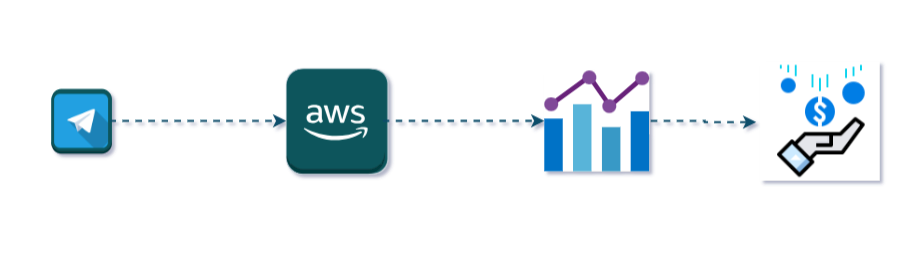

## 4.2\. Sistema Transacional

<h3 id="ingestao-de-dados">4.2.1. Ingestão de Dados</h3>
<p>A ingestão de dados é o ponto de partida para nosso pipeline. Neste projeto, capturamos mensagens de texto enviadas em tempo real pela plataforma Telegram através de APIs.</p>

4.2.2. Foi criado um bucket no AWS S3 para o armazenamento de dados crus.

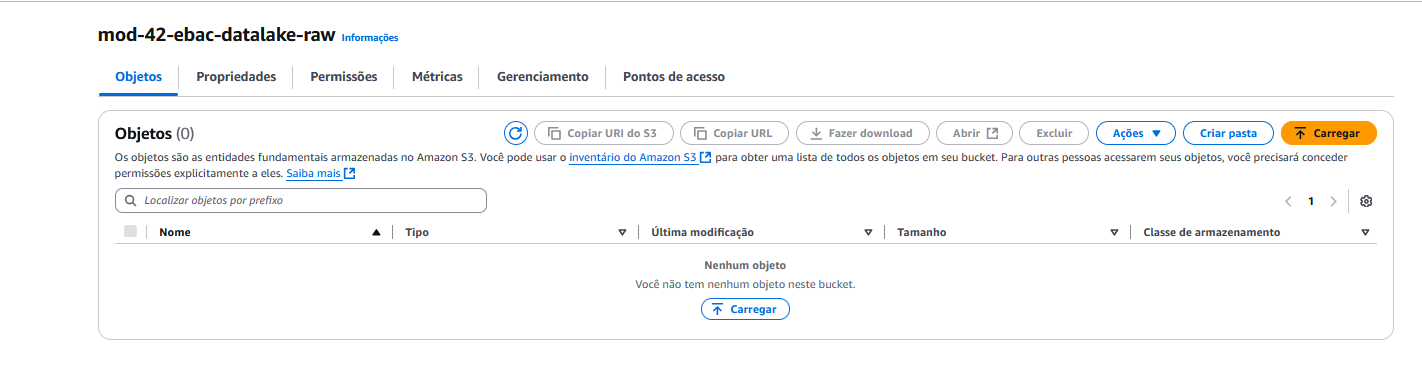

4.2.3.Em seguida Criei uma função no `AWS Lambda` para recebimento das mensagens e armazenamento no formato JSON no `bucket` de dados crus.Foi configurado as variáveis de ambiente e adicionado as permissões de interação com `AWS S3` no `AWS IAM`.

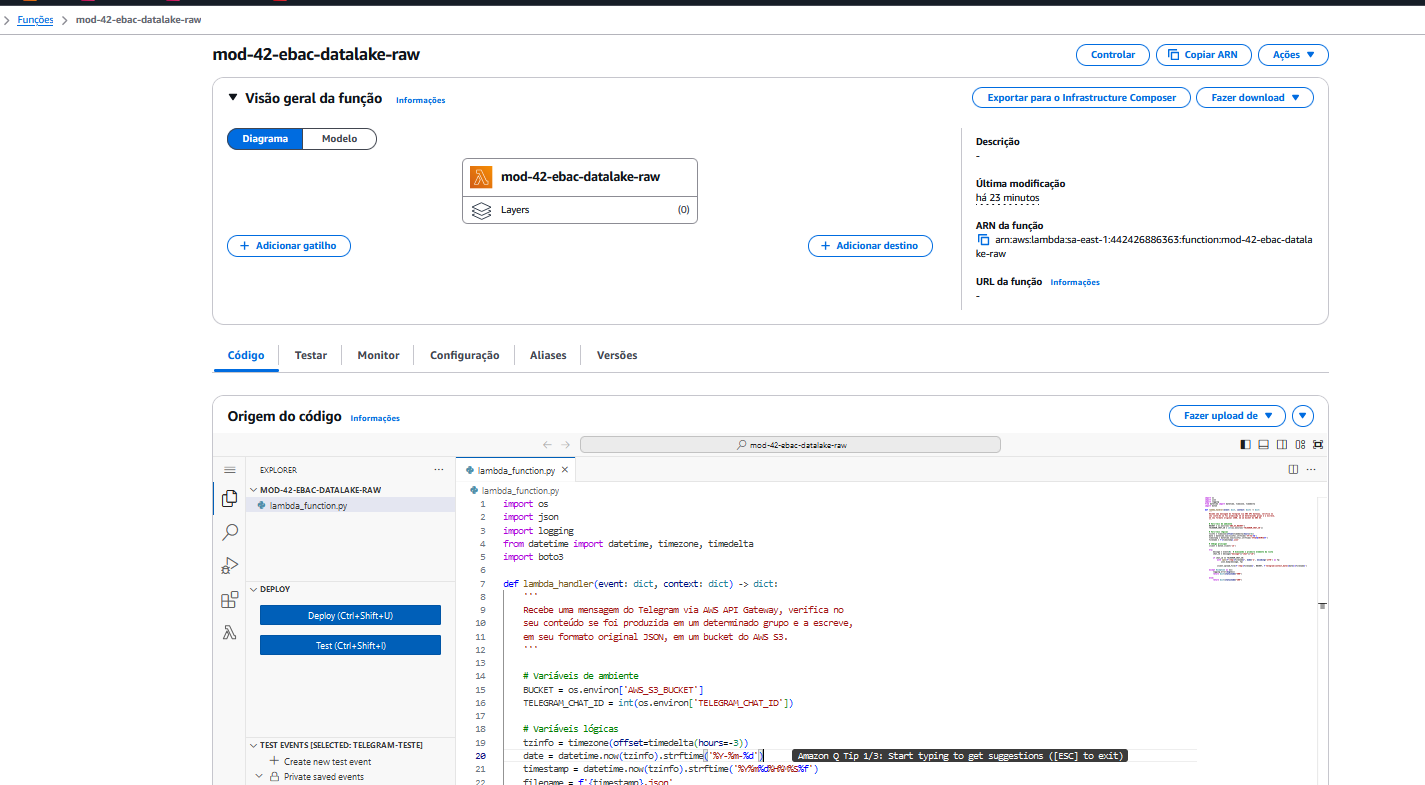

4.2.4.Segui Criando e Configurando variáveis de ambiente no lambda:

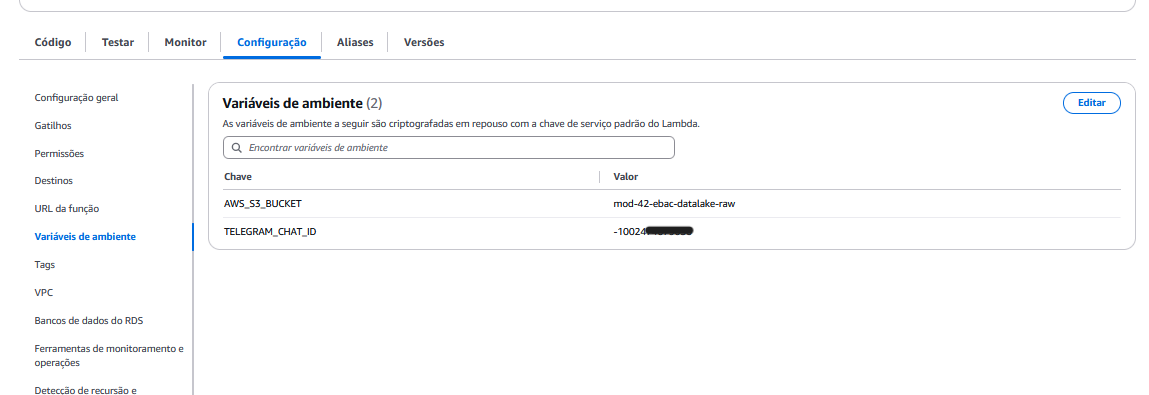

4.2.5.Após Adicionado permissões para que o código possa interagir com o AWS S3 foi Criado um evento de teste de envio de dados para o AWS S3 bucket sendo realizado com sucesso:

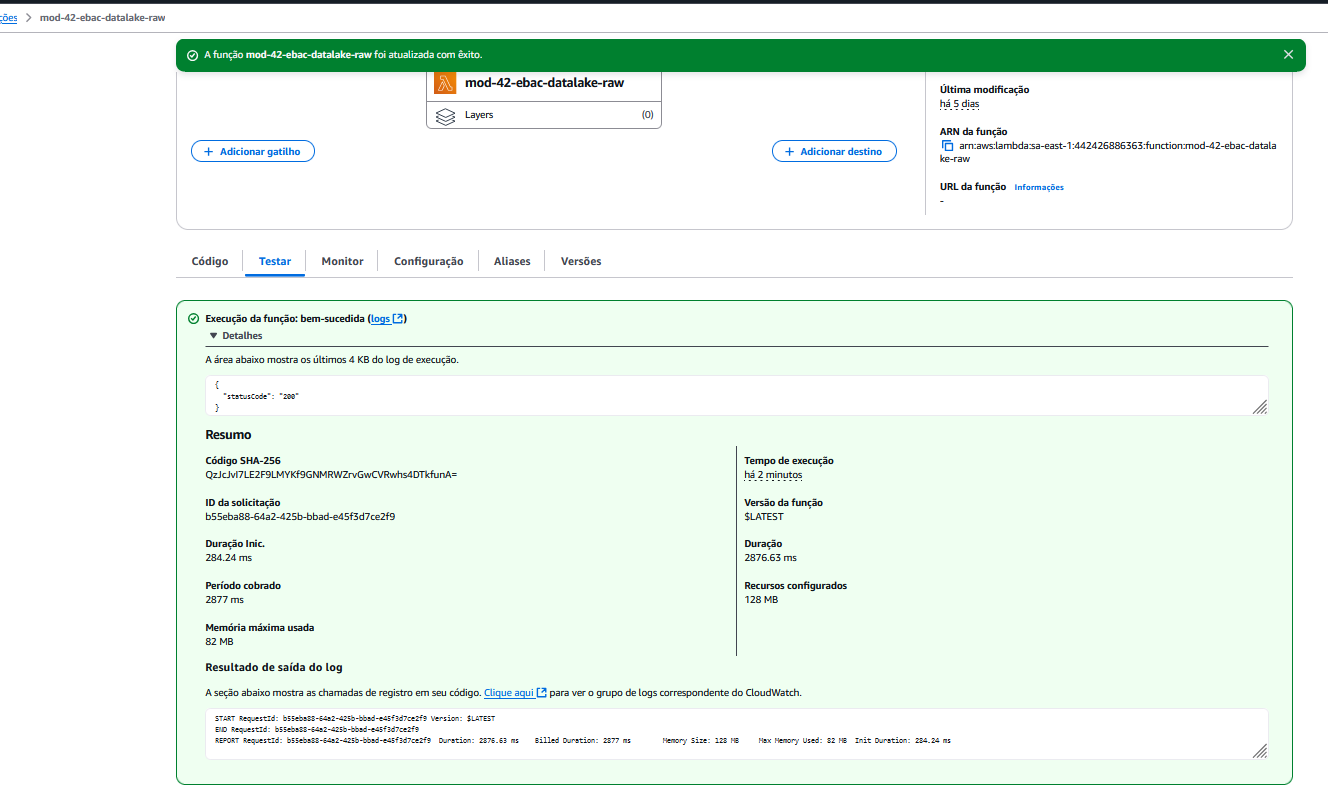

<h3 id="apis">4.3. APIs</h3>
<p>Uma API (Interface de Programação de Aplicações) permite que diferentes sistemas se comuniquem entre si, facilitando a coleta de dados de uma plataforma e seu envio para outro sistema.</p>

4.3.1. Criei uma API no `AWS API Gateway` na qual foi conectada a função do `AWS Lambda`.Em seguida foi Criado um método HTTP para essa API com objetivo de implantação e geração de URL:

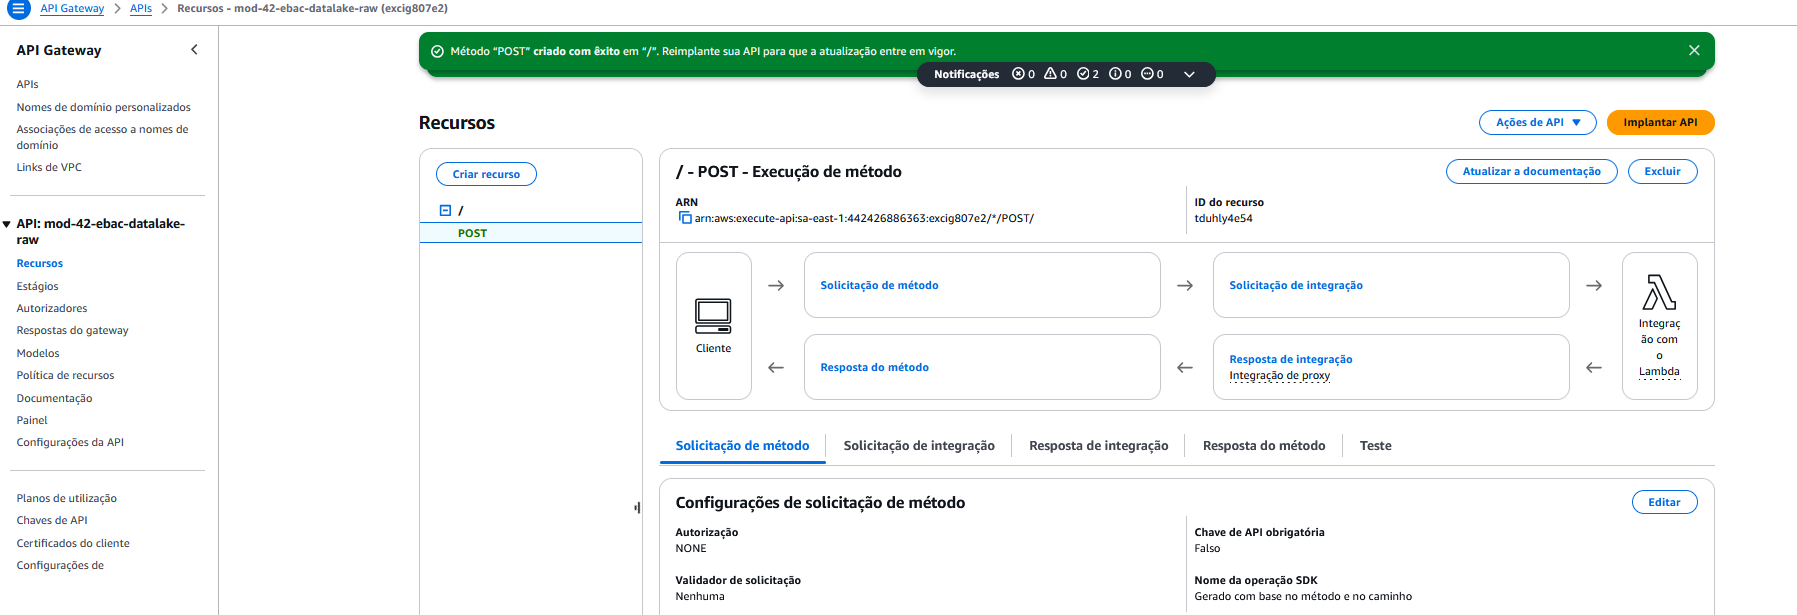

4.3.2.Após implantar ao criarmos um estagio novo foi gerado uma URL

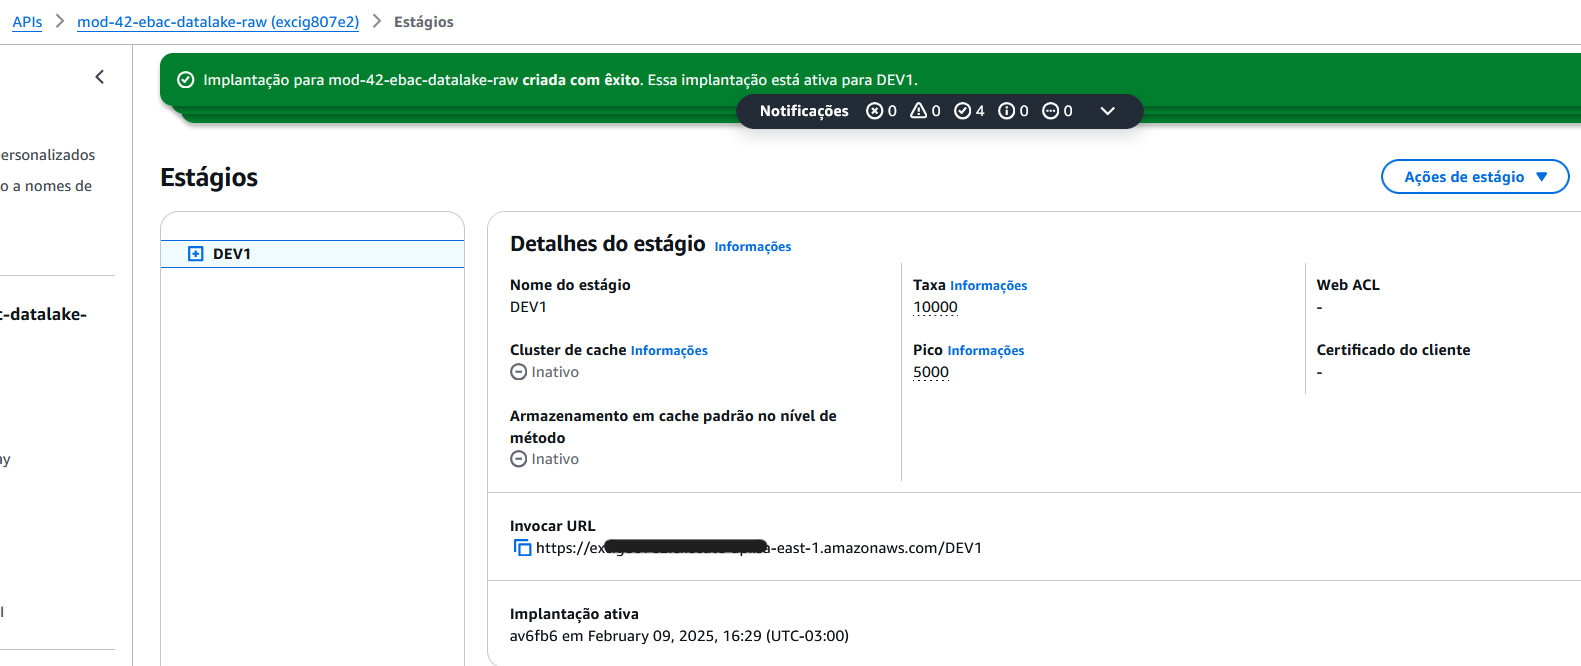

<h3 id="criação-chatbot-telegram">4.4. Criação de Chatbot no Telegram</h3>
<p>4.4.1.Para integrar com o Telegram, utilizamos o BotFather para criar um chatbot que captura mensagens em grupos específicos. Configuramos o bot para enviar essas mensagens diretamente ao nosso pipeline.</p>


4.4.2.Aqui foi Configurado o *webhook* do *bot* através do método `setWebhook` da API de *bots* do **Telegram**. utilize o endereço da API criada no `AWS API Gateway`. Utilize o método `getWebhookInfo` para consultar a integração.

In [ ]:
# Primeiro,foi instalado a biblioteca requests no ambiente Google Colab
!pip install requests

# Importar bibliotecas necessárias
import requests
import json
import os

# Defina a variável de ambiente para o token do Telegram
os.environ['TELEGRAM_BOT_TOKEN'] = 'TOKEN TELEGRAM AQUI'

# URL do AWS API Gateway
aws_api_gateway_url = "URL DO AWS API GATEWAY AQUI"

# Acessar o token do bot do Telegram da variável de ambiente
bot_token = os.getenv('TELEGRAM_BOT_TOKEN')

# URL base da API do Telegram
base_url = f'https://api.telegram.org/bot{bot_token}'

# Configure o webhook
set_webhook_url = f'{base_url}/setWebhook?url={aws_api_gateway_url}'
response = requests.get(set_webhook_url)

# Exiba a resposta formatada em JSON
print("Resposta ao configurar o webhook:")
print(json.dumps(json.loads(response.text), indent=2))


Resposta ao configurar o webhook:
{
  "ok": true,
  "result": true,
  "description": "Webhook is already set"
}


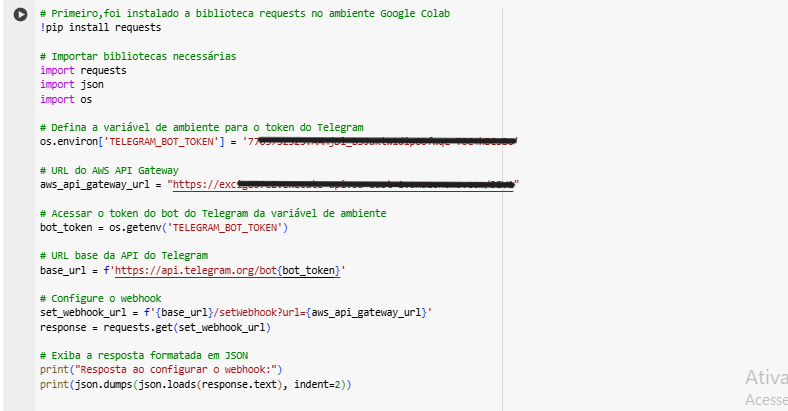

4.4.3. Utilizado o método `getWebhookInfo` para consultar a integração.

In [ ]:
response = requests.get(url=f'{base_url}/getWebhookInfo')

print(json.dumps(json.loads(response.text), indent=2))

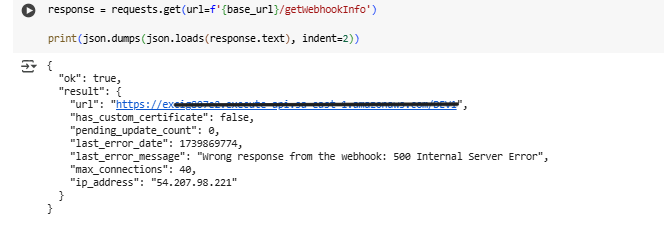

<h3 id="aws-api-gateway">4.5. AWS API Gateway</h3>
<p>O AWS API Gateway atua como um ponto de entrada para nosso pipeline, recebendo os dados das APIs e encaminhando-os para as funções AWS Lambda. Criamos uma API configurada para integração com Lambda via proxy.</p>

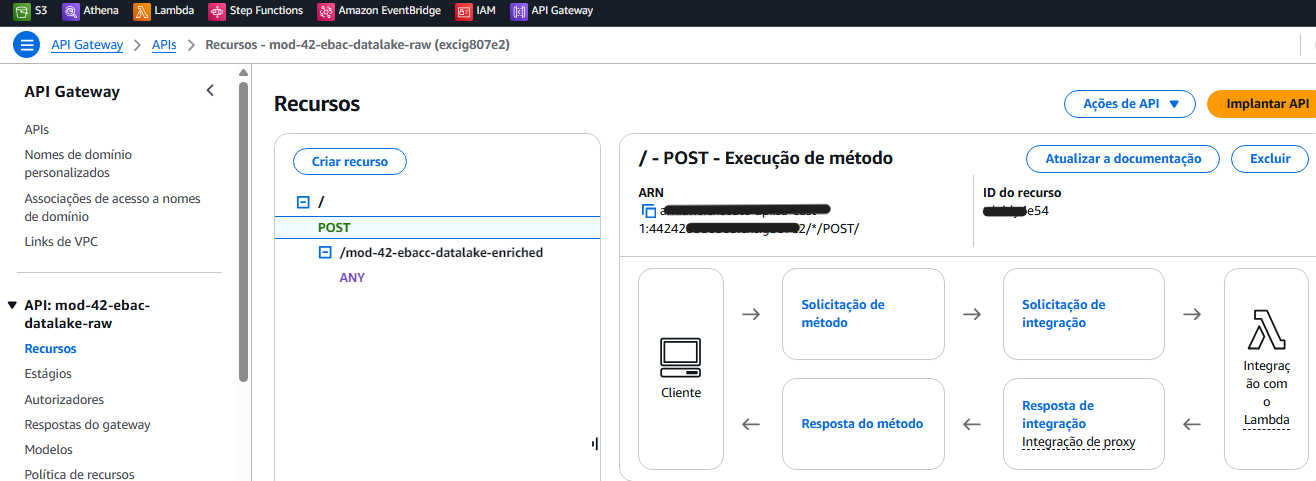

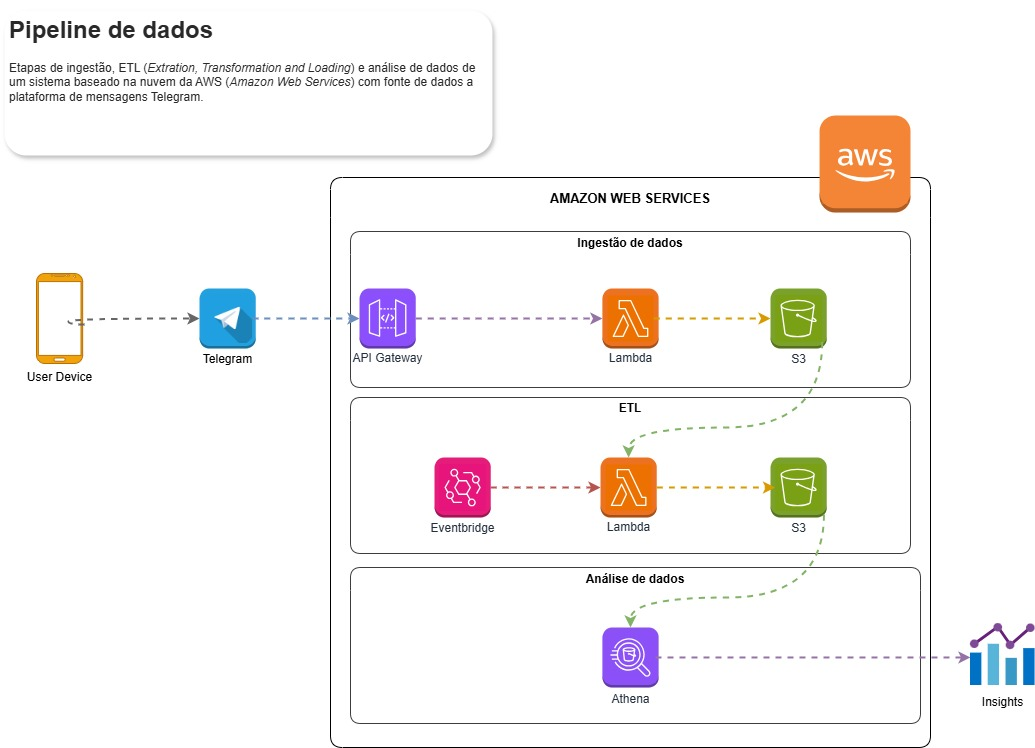

## 4.3\. Sistema Analítico

Neste projeto o sistema compreende a retirada dos dados brutos (raw) do datalake, a transformação deles em informação e a análise em busca de padrões e insights.

<h3 id="etl">4.3.1. ETL (Extração, Transformação e Carregamento)</h3>
<p>O processo de ETL é fundamental para transformar os dados brutos em informações úteis. Este projeto utiliza funções AWS Lambda para realizar a extração, transformação e carregamento dos dados.</p>

<h3 id="extracao-dados">4.3.2. Extração de Dados</h3>
<p>Usamos scripts em Python nas funções AWS Lambda para extrair mensagens do Telegram em formato JSON e armazená-las no AWS S3. Cada função é configurada para processar as mensagens recebidas, verificar a validade dos dados e salvá-los no bucket correto.</p>

4.3.3.Extração do telegram

Abaixo segue script em python responsável pela extração do conteúdo gerado em grupo do Telegram, escrevevendo em formato JSON,em um Bucket do AWS S3 de dados Crus.




```
# import os
import json
import logging
from datetime import datetime, timezone

import boto3


def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagens do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente

  BUCKET = os.environ['AWS_S3_BUCKET']
  TELEGRAM_CHAT_ID = int(os.environ['TELEGRAM_CHAT_ID'])

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    message = json.loads(event["body"])
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

  except Exception as exc:
      logging.error(msg=exc)
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")
```



Dados brutos/Crus transportado do telegram para o S3 bucket `RAW:em formato json`

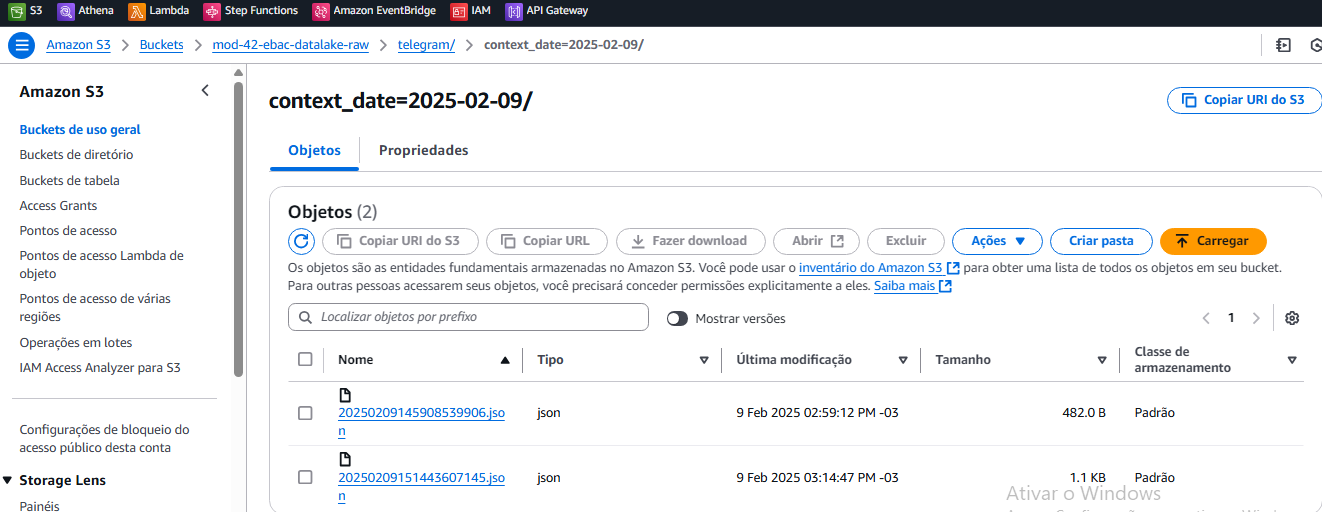

<h3 id="transformacao-dados">4.3.4. Transformação de Dados</h3>
<p>Nesta etapa, os dados coletados são processados e transformados para atender aos requisitos do destino. Isso inclui limpeza, filtragem, agregação e qualquer manipulação necessária.
As funções Lambda processam os dados brutos, extraindo apenas as informações relevantes (como nome, número e mensagem) e transformando-os em tabelas Parquet. Os dados transformados são então salvos no bucket de dados enriquecidos no S3.</p>

Abaixo Script aplicado em função lambda responsável por transformar os dados crus em dados enriquecidos e armazenar no AWS S3 Bucket Enriched2



```
# import os
import json
import logging
from datetime import datetime, timedelta, timezone

import boto3
import pyarrow as pa
import pyarrow.parquet as pq


def lambda_handler(event: dict, context: dict) -> bool:

  '''
  Diariamente é executado para compactar as diversas mensagensm, no formato
  JSON, do dia anterior, armazenadas no bucket de dados cru, em um único
  arquivo no formato PARQUET, armazenando-o no bucket de dados enriquecidos
  '''

  # vars de ambiente

  RAW_BUCKET = os.environ['AWS_S3_BUCKET']
  ENRICHED_BUCKET = os.environ['AWS_S3_ENRICHED']

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  # código principal

  table = None
  client = boto3.client('s3')

  try:

      response = client.list_objects_v2(Bucket=RAW_BUCKET, Prefix=f'telegram/context_date={date}')

      for content in response['Contents']:

        key = content['Key']
        client.download_file(RAW_BUCKET, key, f"/tmp/{key.split('/')[-1]}")

        with open(f"/tmp/{key.split('/')[-1]}", mode='r', encoding='utf8') as fp:

          data = json.load(fp)
          data = data["message"]

        parsed_data = parse_data(data=data)
        iter_table = pa.Table.from_pydict(mapping=parsed_data)

        if table:

          table = pa.concat_tables([table, iter_table])

        else:

          table = iter_table
          iter_table = None

      pq.write_table(table=table, where=f'/tmp/{timestamp}.parquet')
      client.upload_file(f"/tmp/{timestamp}.parquet", ENRICHED_BUCKET, f"telegram/context_date={date}/{timestamp}.parquet")

      return True

  except Exception as exc:
      logging.error(msg=exc)
      return False

def parse_data(data: dict) -> dict:

  date = datetime.now().strftime('%Y-%m-%d')
  timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

  parsed_data = dict()

  for key, value in data.items():

      if key == 'from':
          for k, v in data[key].items():
              if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key == 'chat':
          for k, v in data[key].items():
              if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key in ['message_id', 'date', 'text']:
          parsed_data[key] = [value]

  if not 'text' in parsed_data.keys():
    parsed_data['text'] = [None]

  return parsed_data
```



O script tem como função  retornar a um *bucket* uma tabela no formato *parquet* organizada com os seguintes dados:




* Telegram Schema

| Column Name      | Data Type |
|------------------|-----------|
| message_id       | int64     |
| user_id          | int64     |
| user_is_bot      | bool      |
| user_first_name  | object    |
| chat_id          | int64     |
| chat_type        | object    |
| date             | int64     |
| text             | object    |

<h3 id="carregamento-dados">4.3.5. Carregamento de Dados(Loanding)</h3>
<p>
4.3.6. AWS Event Bridge

O AWS EventBridge é utilizado para agendar a execução das funções de transformação diariamente ás 23:59 PM. Este serviço em conjunto com os scripts automatiza o processo de ETL, garantindo que os dados estejam sempre atualizados.</p>





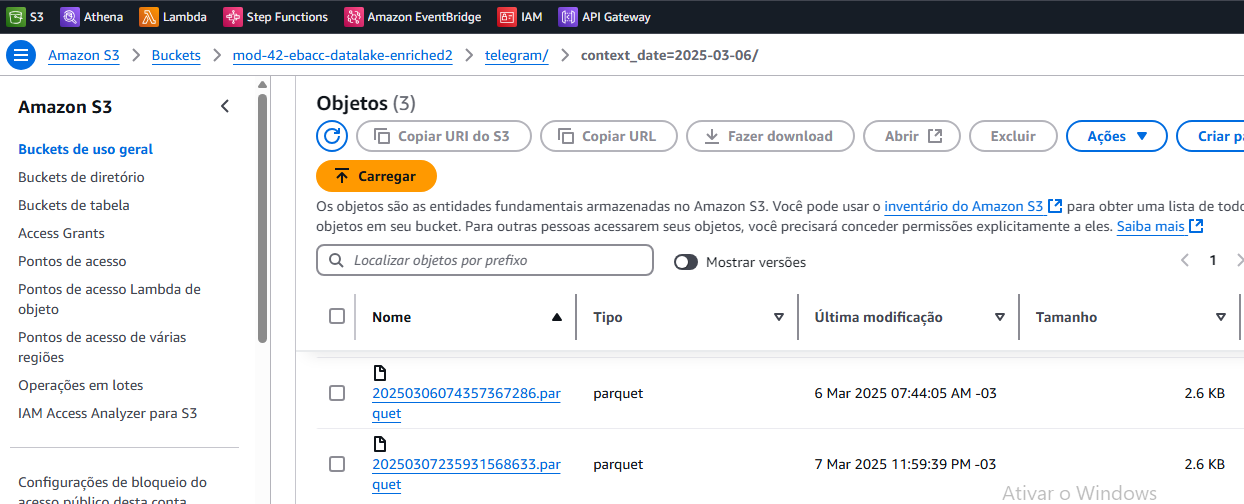

## 4.4\. Apresentação

Nesta etapa, os dados são disponibilizados para os usuários finais, incluindo analistas e cientistas de dados, bem como para sistemas de consulta, como dashboards e motores de consulta. Normalmente, as informações são acessadas por meio de ferramentas de consulta, com SQL sendo a interface principal para a maioria dos usuários. Nesse cenário, a fase de apresentação utiliza o AWS Athena, uma ferramenta com motor de consulta SQL, que facilita a leitura e visualização dos dados armazenados na camada ETL, permitindo análises eficazes.

<h3 id="aws-athena">4.4.1. AWS Athena</h3>
<p>Para a análise e visualização dos dados, utilizamos o AWS Athena. Criamos tabelas externas no Athena apontando para os dados armazenados no S3, permitindo consultas SQL diretamente nos dados transformados.</p>

Criação da tabela SQL no AWS Athena - Telegram

```sql
CREATE EXTERNAL TABLE `telegram`(
  `message_id` bigint,
  `user_id` bigint,
  `user_is_bot` boolean,
  `user_first_name` string,
  `chat_id` bigint,
  `chat_type` string,
  `text` string,
  `date` bigint)
PARTITIONED BY (
  `context_date` date)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://<bucket>/telegram/'
```


**Validação dos Dados:** Após carregar dados na tabela "Telegram", a consulta SELECT * FROM "telegram" permite verificar se todos os dados foram carregados corretamente. É uma maneira rápida de garantir que não houve problemas durante o processo de ETL (Extração, Transformação e Carregamento).

```sql
SELECT * FROM "Telegram";
```


O resultado da consulta é exibido na página do serviço ***Athena*** da seguinte maneira:

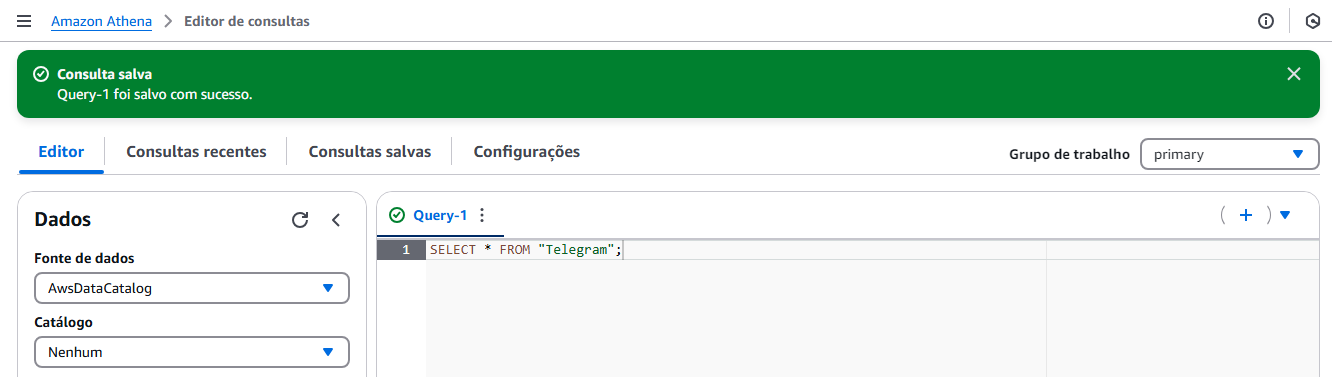

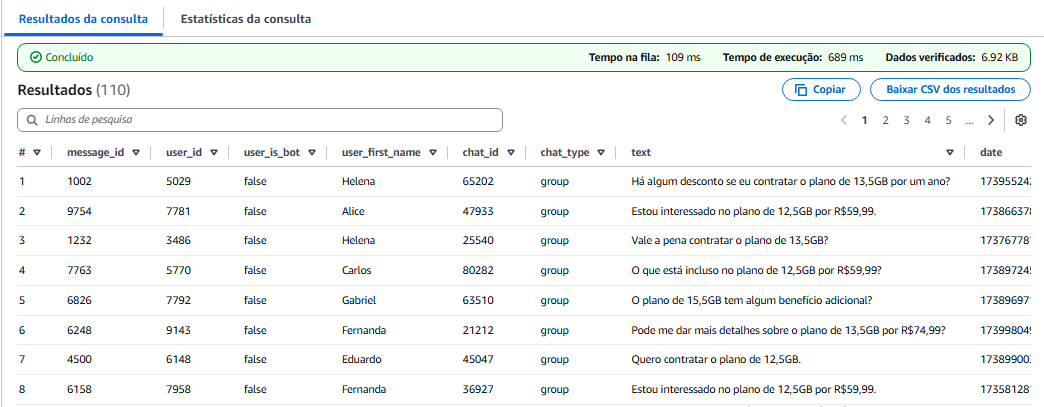

<h3 id="analise-dados">4.4.2. Análise de Dados</h3>
<p>Utilizamos consultas SQL no Athena para explorar os dados e gerar insights. Essas consultas nos permitem entender padrões de comportamento, como horários de maior interação e conteúdo das mensagens, auxiliando na tomada de decisões estratégicas.</p>

**Query-1:**Segmentação por Plano de Internet

**Objetivo:**Esta consulta conta o número de mensagens que mencionam cada tipo de plano de internet, ajudando a identificar quais planos são mais populares entre os usuários.



```
# SELECT
    CASE
        WHEN text LIKE '%plano de 12,5GB%' THEN '12,5GB por R$59,99'
        WHEN text LIKE '%plano de 13,5GB%' THEN '13,5GB por R$74,99'
        WHEN text LIKE '%plano de 15,5GB%' THEN '15,5GB por R$89,99'
        ELSE 'Outro'
    END AS plano_internet,
    COUNT(*) AS qtd_mensagens
FROM telegram
GROUP BY
    CASE
        WHEN text LIKE '%plano de 12,5GB%' THEN '12,5GB por R$59,99'
        WHEN text LIKE '%plano de 13,5GB%' THEN '13,5GB por R$74,99'
        WHEN text LIKE '%plano de 15,5GB%' THEN '15,5GB por R$89,99'
        ELSE 'Outro'
    END
ORDER BY qtd_mensagens DESC;
```



<h4> Tabela no AWS Athena</h4>

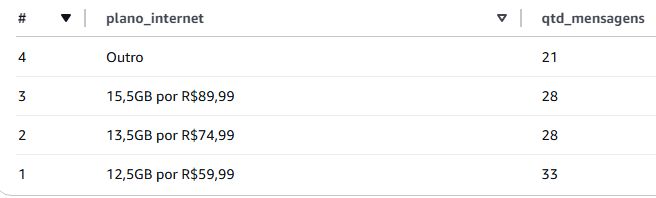

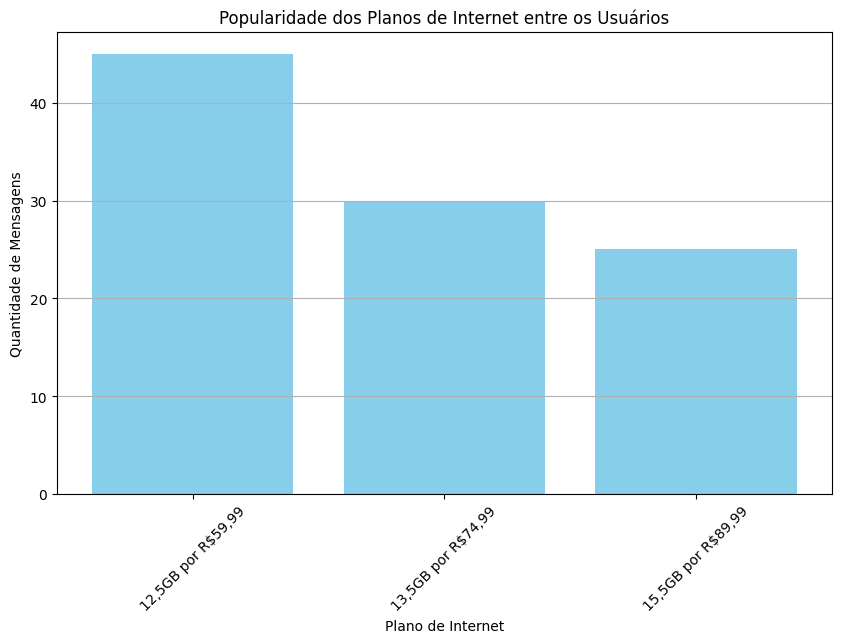

<h2>Insights</h2>

Ao analisar o gráfico, **é evidente que o plano de 12,5GB por R$59,99 é o mais popular entre os usuários**, com a maior quantidade de mensagens mencionando este plano. Isso indica uma preferência clara pelo plano mais acessível em termos de custo-benefício.

Os planos de `13,5GB por R$74,99  e  15,5GB  por  R$89,99` têm menos menções, sugerindo que os usuários são mais atraídos pelo plano mais barato, mesmo que ofereça uma quantidade menor de dados.

<h2>Estratégias e Ações</h2>


*   **Promoções e Campanhas:** Focar campanhas de marketing no plano de 12,5GB por R$59,99, uma vez que ele já possui uma alta popularidade. Oferecer promoções ou descontos adicionais para este plano pode aumentar ainda mais as vendas e o engajamento.
*   **Upselling e Cross-selling:** Utilizar o interesse no plano de 12,5GB como uma porta de entrada para apresentar os planos de 13,5GB e 15,5GB. Por exemplo, oferecer um período de teste gratuito ou descontos temporários para esses planos pode incentivar os usuários a experimentar os pacotes mais caros.

*   **Feedback dos Usuários:** Realizar pesquisas para entender melhor por que o plano de 12,5GB é o mais popular. Isso pode revelar insights sobre as necessidades e preferências dos usuários, que podem ser usados para ajustar a oferta de produtos e serviços.
*   **Análise de Preços:** Considerar ajustar os preços dos planos de 13,5GB e 15,5GB para torná-los mais competitivos, baseando-se no feedback dos usuários e na análise de mercado.





**Query-2:**Horários de Pico de Interesse

**Objetivo:**Esta consulta analisa os horários em que os usuários mencionam interesse em planos de internet, permitindo identificar os melhores momentos para campanhas de marketing.


```
# WITH parsed_date_cte AS (
    SELECT *,
           from_unixtime(date) AS parsed_date
    FROM telegram
)
SELECT
    extract(hour from parsed_date) AS hora_do_dia,
    COUNT(*) AS qtd_mensagens
FROM parsed_date_cte
WHERE text LIKE '%plano%'
GROUP BY extract(hour from parsed_date)
ORDER BY qtd_mensagens DESC;
```



<h4> Tabela no AWS Athena</h4>

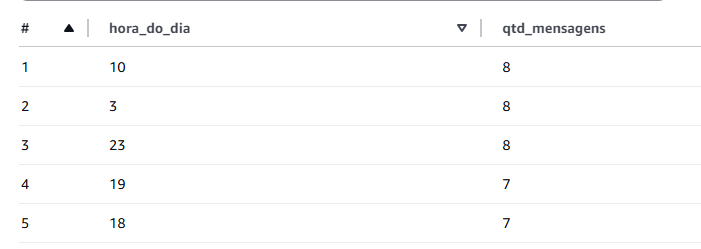

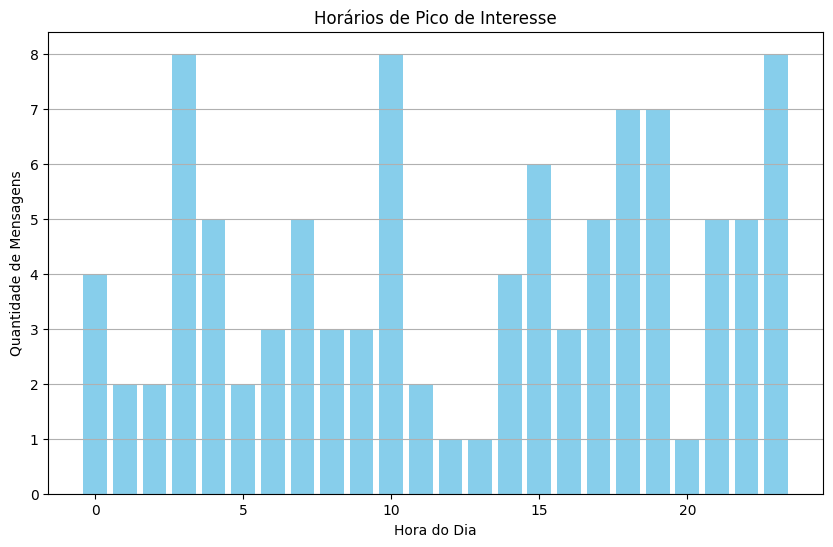

<h2>Insights</h2>
<ul>
  <li><strong>Picos de Mensagens:</strong> As horas com maior quantidade de mensagens são:
    <ul>
      <li><strong>3 AM:</strong> 8 mensagens</li>
      <li><strong>10 AM:</strong> 8 mensagens</li>
      <li><strong>23 PM:</strong> 8 mensagens</li>
    </ul>
  </li>
  <li><strong>Outros Horários Relevantes:</strong> Existem picos secundários em:
    <ul>
      <li><strong>18 PM e 19 PM:</strong> Com 7 mensagens cada</li
      <li><strong>4 AM, 7 AM, e 17 PM:</strong> Com 5 mensagens cada</li>
    </ul>
  </li>
  <li><strong>Baixa Atividade:</strong> Os períodos com menor atividade são entre 1 AM, 2 AM,5 AM e 11AM com apenas 2  mensagens.</li>
  <li><strong>Baixa Atividade:</strong> Os períodos com o mínimo de  atividade são entre 12 AM, 13 PM,20PM com apenas 1  mensagem.</li>
</ul>

<h2>Estratégias e Ações</h2>
<ul>
  <li><strong>Campanhas de Marketing nos Picos:</strong>
    <ul>
      <li><strong>3 AM, 10 AM e 23 PM:</strong> Focar campanhas de marketing e anúncios nesses horários para maximizar o engajamento dos usuários. Esse é o momento ideal para lançar promoções e novos planos, já que há uma alta atividade de mensagens.</li>
    </ul>
  </li>
  <li><strong>Promoções em Horários Secundários:</strong>
    <ul>
      <li><strong>4 AM, 7 AM, 17 PM, 18 PM, 19 PM:</strong> Considerar rodar promoções ou ofertas especiais nesses horários para capturar o interesse adicional dos usuários. Isso ajuda a manter um fluxo constante de engajamento ao longo do dia.</li>
    </ul>
  </li>
  <li><strong>Evitar Campanhas em Períodos de Baixa Atividade:</strong>
    <ul>
      <li><strong>1 AM, 2 AM, 5 AM e 11 AM, 12 AM, 13 PM e 20 PM   :</strong> Evitar agendar atividades de marketing importantes durante esses horários, pois a atividade dos usuários é baixa, o que pode resultar em desperdício de recursos.</li>
    </ul>
  </li>
  <li><strong>Análise de Tendências e Ajustes:</strong>
    <ul>
      <li><strong>Monitoramento Contínuo:</strong> Continuar monitorando os dados de mensagens para identificar possíveis mudanças nos padrões de comportamento. Ajustar as campanhas de marketing conforme necessário para se alinhar com novos picos de interesse.</li>
    </ul>
  </li>
  <li><strong>Personalização de Ofertas:</strong>
    <ul>
      <li><strong>Segmentação:</strong> Usar os horários de pico para segmentar usuários e oferecer planos personalizados e promoções especiais. Mensagens direcionadas podem aumentar significativamente a taxa de conversão.</li>
    </ul>
  </li>
</ul>


**Query-3:**Dias de Maior Atividade

**Objetivo**:Esta consulta conta o número de mensagens enviadas em cada dia da semana, ajudando a identificar os dias de maior atividade dos usuários e planejando campanhas de acordo.



```
# WITH parsed_date_cte AS (
    SELECT *,
           from_unixtime(date) AS parsed_date
    FROM telegram
)
SELECT
    day_of_week(parsed_date) AS dia_da_semana,
    COUNT(*) AS qtd_mensagens
FROM parsed_date_cte
GROUP BY day_of_week(parsed_date)
ORDER BY qtd_mensagens DESC;

```



<h4> Tabela no AWS Athena</h4>

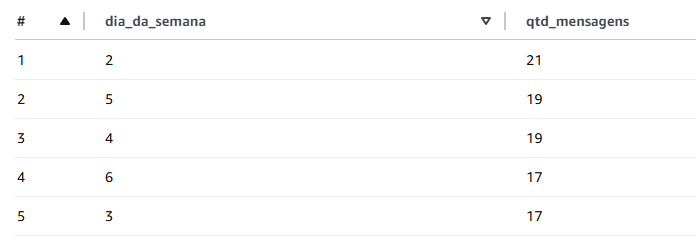

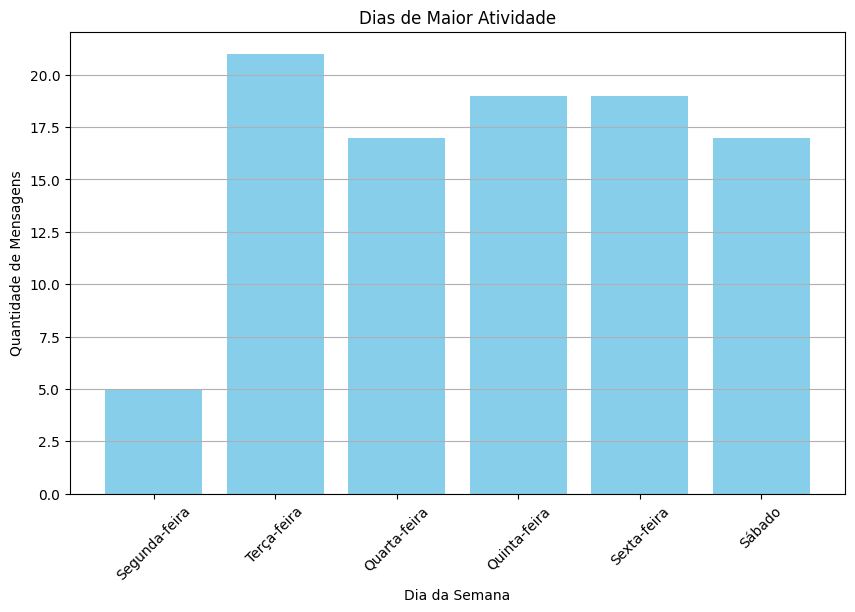

<h2>Insights</h2>
<ul>
  <li><strong>Picos de Atividade:</strong>
    <ul>
      <li><strong>Terça-feira, Quinta-feira e Sexta-feira:</strong> Estes dias são os mais ativos, com aproximadamente 20 mensagens cada.</li>
      <li><strong>Quarta-feira e Sábado:</strong> Apresentam uma alta atividade, com cerca de 17 mensagens cada.</li>
      <li><strong>Segunda-feira:</strong> É o dia com a menor atividade, registrando apenas 5 mensagens.</li>
    </ul>
  </li>
</ul>

<h2>Estratégias e Ações</h2>
<ul>
  <li><strong>Foco em Dias de Alta Atividade:</strong>
    <ul>
      <li>Concentre campanhas importantes, como anúncios e promoções, nas terças, quintas e sextas, aproveitando o engajamento elevado nesses dias.</li>
    </ul>
  </li>
  <li><strong>Melhorar Engajamento nas Segundas-Feiras:</strong>
    <ul>
      <li>Introduza campanhas especiais, como descontos ou temas atrativos, para aumentar a interação nas segundas-feiras.</li>
    

**Query-4:** Engajamento por Usuário

**Objetivo**:
Esta consulta identifica os usuários mais engajados, permitindo ações de marketing direcionadas a esses usuários para aumentar ainda mais o engajamento e a fidelidade



```
# SELECT user_first_name, COUNT(*) AS qtd_mensagens
FROM telegram
GROUP BY user_first_name
ORDER BY qtd_mensagens DESC
LIMIT 10;

```



<h4> Tabela no AWS Athena</h4>

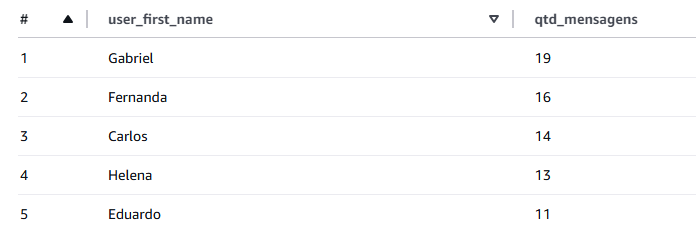

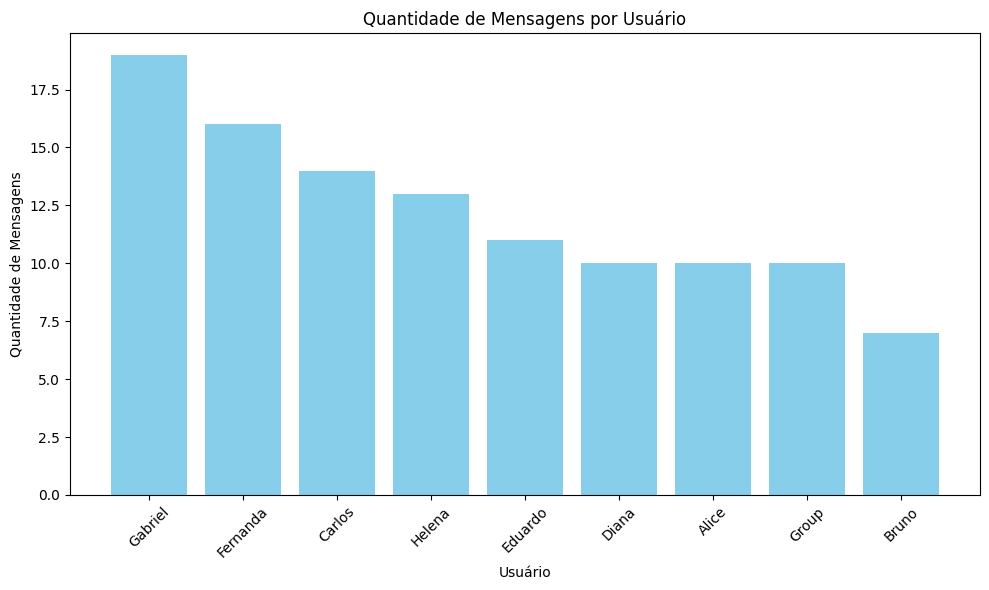

<h2>Insights</h2>
<ul>
  <li><strong>Usuários Altamente Engajados:</strong>
    <ul>
      <li><strong>Gabriel e Fernanda:</strong> São os mais engajados, com Gabriel liderando em número de mensagens. Isso demonstra alta participação e potencial para influenciar as discussões do grupo.</li>
    </ul>
  </li>
  <li><strong>Usuários Menos Participativos:</strong>
    <ul>
      <li><strong>Bruno e Group:</strong> Apresentam baixos níveis de interação, indicando possível desinteresse ou desconexão com os tópicos abordados.</li>
    </ul>
  </li>
  <li><strong>Distribuição de Engajamento:</strong>
    <ul>
      <li>Há uma diferença significativa entre os mais e menos ativos, mostrando que o engajamento depende de um grupo pequeno de usuários.</li>
    </ul>
  </li>
</ul>

<h2>Estratégias e Ações</h2>
<ul>
  <li><strong>Fortalecer os Usuários Mais Engajados:</strong>
    <ul>
      <li>Incentive Gabriel e Fernanda a continuar participando por meio de reconhecimentos, como elogios ou atribuição de papéis de liderança.</li>
      <li>Encoraje-os a compartilhar temas e ideias que possam atrair outros membros para discussões mais amplas.</li>
    </ul>
  </li>
  <li><strong>Incentivar Maior Participação dos Menos Ativos:</strong>
    <ul>
      <li>Promova tópicos de maior interesse para Bruno e Group, possivelmente relacionados a feedbacks específicos ou preferências deles.</li>
      <li>Utilize mensagens diretas para convidá-los a participar ativamente de discussões futuras.</li>
    </ul>
  </li>
  <li><strong>Promover Engajamento Equilibrado:</strong>
    <ul>
      <li>Planeje atividades grupais que exijam colaboração entre todos os membros, como eventos temáticos ou desafios internos.</li>
      <li>Crie campanhas de monitoramento regular para ajustar estratégias baseadas em padrões de comportamento emergentes.</li>
    </ul>
  </li>
</ul>


**Query-5:** Mensagens por Tipo de Plano e Hora do Dia

**Objetivo:**
Esta consulta combina a análise de interesse por tipo de plano de internet com a hora do dia, ajudando a entender quando os usuários estão mais propensos a discutir sobre planos específicos.



```
# WITH parsed_date_cte AS (
    SELECT *,
           from_unixtime(date) AS parsed_date
    FROM telegram
)
SELECT
    CASE
        WHEN text LIKE '%plano de 12,5GB%' THEN '12,5GB por R$59,99'
        WHEN text LIKE '%plano de 13,5GB%' THEN '13,5GB por R$74,99'
        WHEN text LIKE '%plano de 15,5GB%' THEN '15,5GB por R$89,99'
        ELSE 'Outro'
    END AS plano_internet,
    extract(hour from parsed_date) AS hora_do_dia,
    COUNT(*) AS qtd_mensagens
FROM parsed_date_cte
WHERE text LIKE '%plano%'
GROUP BY
    CASE
        WHEN text LIKE '%plano de 12,5GB%' THEN '12,5GB por R$59,99'
        WHEN text LIKE '%plano de 13,5GB%' THEN '13,5GB por R$74,99'
        WHEN text LIKE '%plano de 15,5GB%' THEN '15,5GB por R$89,99'
        ELSE 'Outro'
    END,
    extract(hour from parsed_date)
ORDER BY qtd_mensagens DESC;
```



<h4> Tabela no AWS Athena</h4>

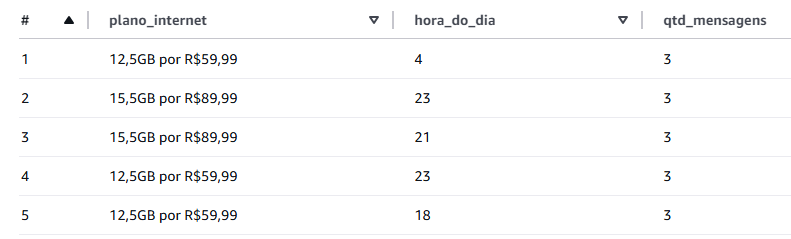

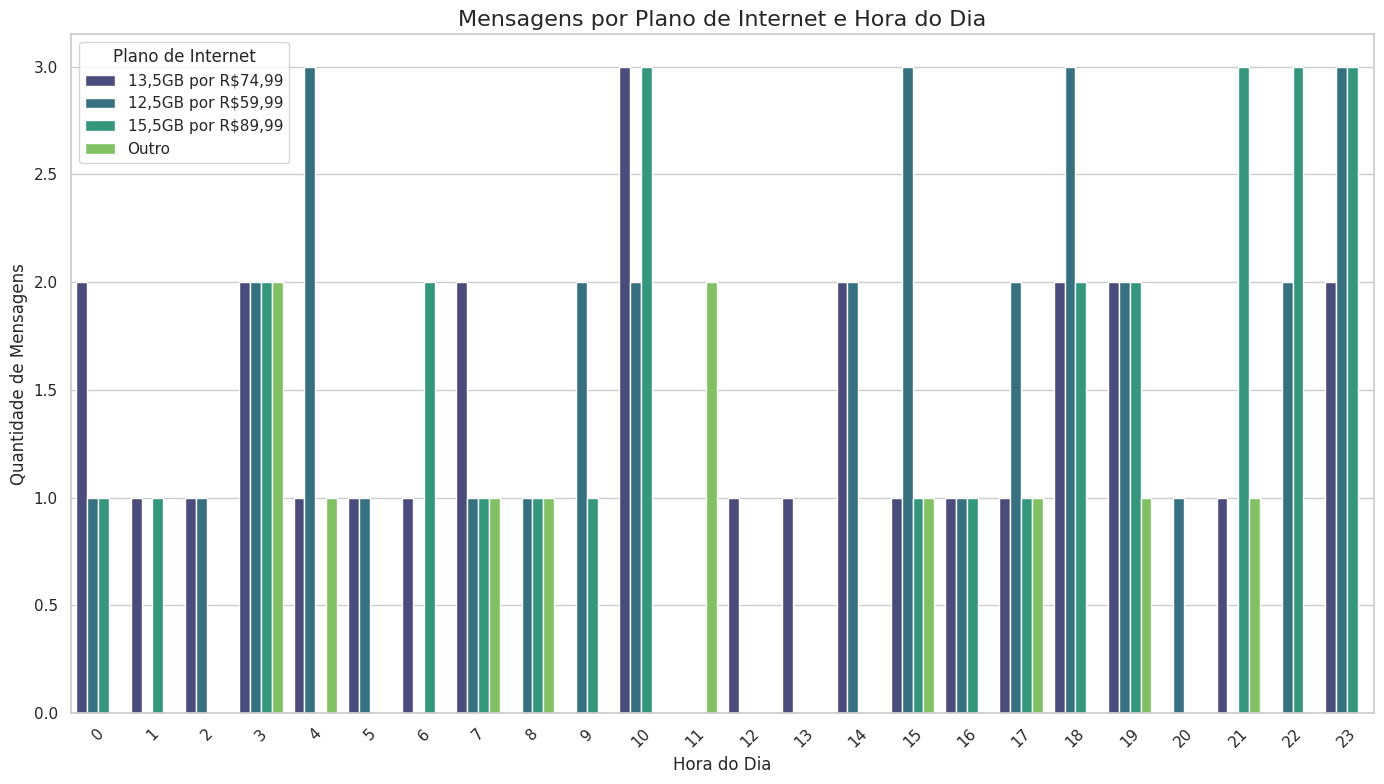

<h2>Insights</h2>
<ul>
  <li><strong>Picos de Discussão:</strong>
    <ul>
      <li><strong>Entre 12h e 15h:</strong> Este é o período de maior atividade para mensagens sobre os planos de internet, independentemente do tipo de plano.</li>
      <li><strong>Período de Menor Atividade:</strong> Horários noturnos, como após as 22h, apresentam pouca ou nenhuma discussão sobre planos.</li>
    </ul>
  </li>
  <li><strong>Popularidade por Tipo de Plano:</strong>
    <ul>
      <li><strong>13,5GB por R$74,99:</strong> Este plano é o mais discutido durante o dia.</li>
      <li><strong>12,5GB por R$59,99:</strong> Recebe atenção moderada, com destaque próximo ao meio-dia.</li>
      <li><strong>15,5GB por R$89,99:</strong> Embora menos popular que os anteriores, há discussões consistentes durante a tarde.</li>
      <li><strong>Outro:</strong> Planos classificados como "outro" têm menor relevância, mas ainda são mencionados no final da tarde.</li>
    </ul>
  </li>
</ul>

<h2>Estratégias e Ações</h2>
<ul>
  <li><strong>Aproveitar os Picos de Discussão:</strong>
    <ul>
      <li>Realize campanhas de marketing ou anúncios de novos planos entre 12h e 15h, aproveitando a maior atenção dos usuários.</li>
    </ul>
  </li>
  <li><strong>Segmentação por Tipo de Plano:</strong>
    <ul>
      <li>Direcione anúncios personalizados para cada tipo de plano com base nos horários de maior menção. Por exemplo, promova o plano de 13,5GB durante a tarde.</li>
    </ul>
  </li>
  <li><strong>Aumentar a Interação em Horários de Baixa Atividade:</strong>
    <ul>
      <li>Introduza conteúdos ou promoções exclusivas para horários noturnos, incentivando usuários a interagir nesses períodos menos movimentados.</li>
    </ul>
  </li>
</ul>


**Query-6:** Mensagens Negativas e Positivas

**Objetivo:**Esta consulta classifica as mensagens dos usuários como positivas ou negativas com base em palavras-chave, ajudando a entender melhor a percepção dos usuários sobre os planos de internet.



```
# SELECT
    CASE
        WHEN text LIKE '%interessado%' OR text LIKE '%gostaria%' THEN 'Positiva'
        WHEN text LIKE '%diferença%' OR text LIKE '%desconto%' THEN 'Neutra'
        ELSE 'Negativa'
    END AS sentimento,
    COUNT(*) AS qtd_mensagens
FROM telegram
GROUP BY
    CASE
        WHEN text LIKE '%interessado%' OR text LIKE '%gostaria%' THEN 'Positiva'
        WHEN text LIKE '%diferença%' OR text LIKE '%desconto%' THEN 'Neutra'
        ELSE 'Negativa'
    END
ORDER BY qtd_mensagens DESC;

```



<h4> Tabela no AWS Athena</h4>

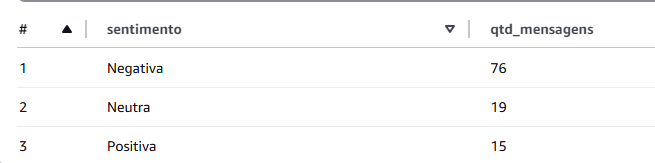

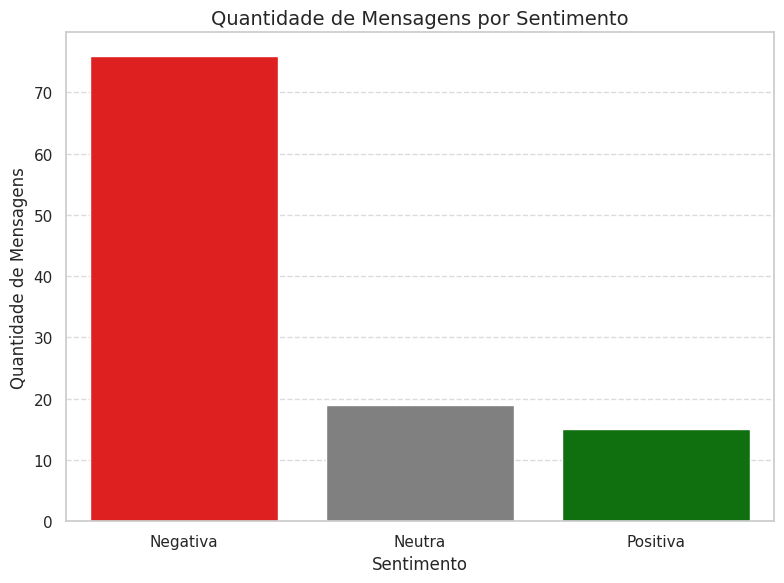

<h2>Insights</h2>
<ul>
  <li><strong>Predominância de Sentimentos Negativos:</strong>
    <ul>
      <li>Mais de 70 mensagens foram classificadas como negativas, o que indica uma percepção majoritariamente insatisfatória dos usuários em relação aos planos de internet.</li>
    </ul>
  </li>
  <li><strong>Sentimentos Neutros:</strong>
    <ul>
      <li>Mensagens neutras representam cerca de 20 interações, apontando para uma abordagem mais descritiva ou informativa, sem opinião clara sobre os planos.</li>
    </ul>
  </li>
  <li><strong>Baixo Índice de Mensagens Positivas:</strong>
    <ul>
      <li>Com apenas 15 mensagens positivas, há um indicativo de pouca satisfação ou entusiasmo dos usuários com relação aos serviços oferecidos.</li>
    </ul>
  </li>
</ul>

<h2>Estratégias e Ações</h2>
<ul>
  <li><strong>Endereçar Feedback Negativo:</strong>
    <ul>
      <li>Identificar os principais temas ou problemas relacionados às mensagens negativas (ex.: custo, qualidade ou suporte técnico).</li>
      <li>Desenvolver planos de ação para solucionar as reclamações mais recorrentes e comunique as melhorias aos usuários.</li>
    </ul>
  </li>
  <li><strong>Promover Interação Positiva:</strong>
    <ul>
      <li>Criar campanhas ou conteúdos que destaquem os benefícios e diferenciais dos planos de internet para estimular mais mensagens positivas.</li>
      <li>Incentivar feedback construtivo com pesquisas ou enquetes, recompensando usuários que compartilhem avaliações positivas.</li>
    </ul>
  </li>
  <li><strong>Analisar Mensagens Neutras:</strong>
    <ul>
      <li>Utilizar mensagens neutras para obter informações detalhadas sobre os serviços e possíveis melhorias, pois elas geralmente trazem descrições úteis e objetivas.</li>
    </ul>
  </li>
</ul>


**Query-7:** Análise de Retenção de Usuários

**Objetivo:**Esta consulta identifica a frequência com que os mesmos usuários mencionam planos de internet, ajudando a analisar a retenção de clientes.



```
# SELECT
    user_first_name,
    COUNT(DISTINCT DATE(FROM_UNIXTIME(date))) AS dias_ativos
FROM
    telegram
WHERE
    text LIKE '%plano%'
GROUP BY
    user_first_name
ORDER BY
    dias_ativos DESC;

```



<h4> Tabela no AWS Athena</h4>

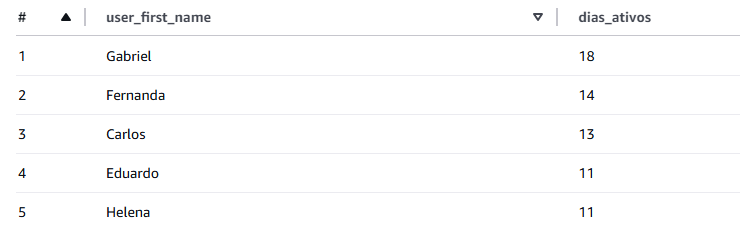

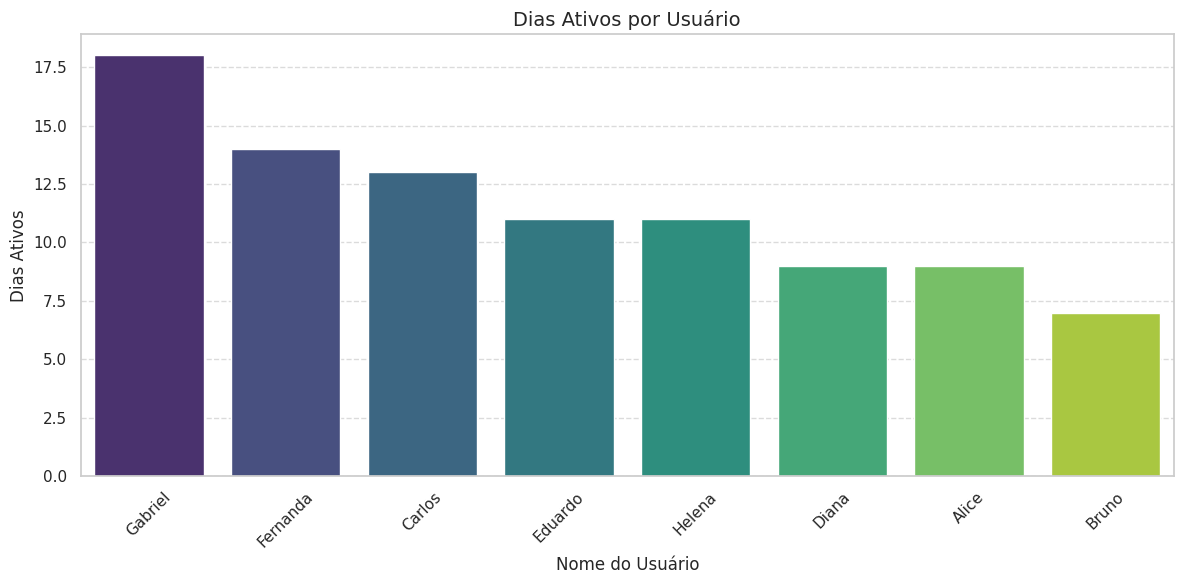

<h2>Insights</h2>
<ul>
  <li><strong>Usuários Altamente Retidos:</strong>
    <ul>
      <li><strong>Gabriel e Fernanda:</strong> Têm o maior número de dias ativos, o que demonstra um alto nível de retenção e engajamento com o tema de planos de internet.</li>
    </ul>
  </li>
  <li><strong>Usuários Moderadamente Retidos:</strong>
    <ul>
      <li><strong>Carlos, Eduardo, Helena e Diana:</strong> Apresentam retenção moderada, com participação ativa em vários dias, mas ainda abaixo dos líderes Gabriel e Fernanda.</li>
    </ul>
  </li>
  <li><strong>Usuários com Baixa Retenção:</strong>
    <ul>
      <li><strong>Bruno:</strong> É o usuário com o menor número de dias ativos, indicando que pode haver falta de interesse ou desengajamento.</li>
    </ul>
  </li>
</ul>

<h2>Estratégias e Ações</h2>
<ul>
  <li><strong>Fortalecer o Engajamento dos Usuários Retidos:</strong>
    <ul>
      <li>Recompensar a fidelidade de usuários como Gabriel e Fernanda com benefícios exclusivos, como acesso antecipado a novos planos ou descontos especiais.</li>
      <li>Incentivar esses usuários a continuar engajados, oferecendo programas de indicação para trazer novos usuários ao tema.</li>
    </ul>
  </li>
  <li><strong>Estimular Retenção de Usuários Moderados:</strong>
    <ul>
      <li>Enviar conteúdos personalizados para Carlos, Eduardo, Helena e Diana, destacando planos que possam atender melhor às suas necessidades.</li>
      <li>Realizar campanhas de engajamento, como quizzes ou desafios relacionados a planos de internet, para aumentar a interação desses usuários.</li>
    </ul>
  </li>
  <li><strong>Resgatar Usuários com Baixa Retenção:</strong>
    <ul>
      <li>Identificar os motivos de baixa participação de Bruno e direcionar promoções ou mensagens personalizadas para captar seu interesse.</li>
      <li>Aplicar pesquisas rápidas para entender o que poderia motivá-lo a interagir mais frequentemente.</li>
    </ul>
  </li>
</ul>


**Query-8:** Mensagens mais frequentes no chat

**Objetivo:**Essa consulta busca entender padrões de comportamento, interesses e linguagens comuns entre os usuários.



```
# SELECT
    text AS mensagem,
    COUNT(*) AS frequencia
FROM
    telegram
GROUP BY
    text
ORDER BY
    frequencia DESC
LIMIT 10;

```



<h4> Tabela no AWS Athena</h4>

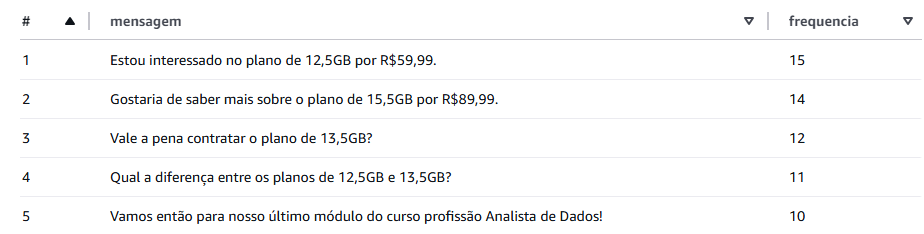

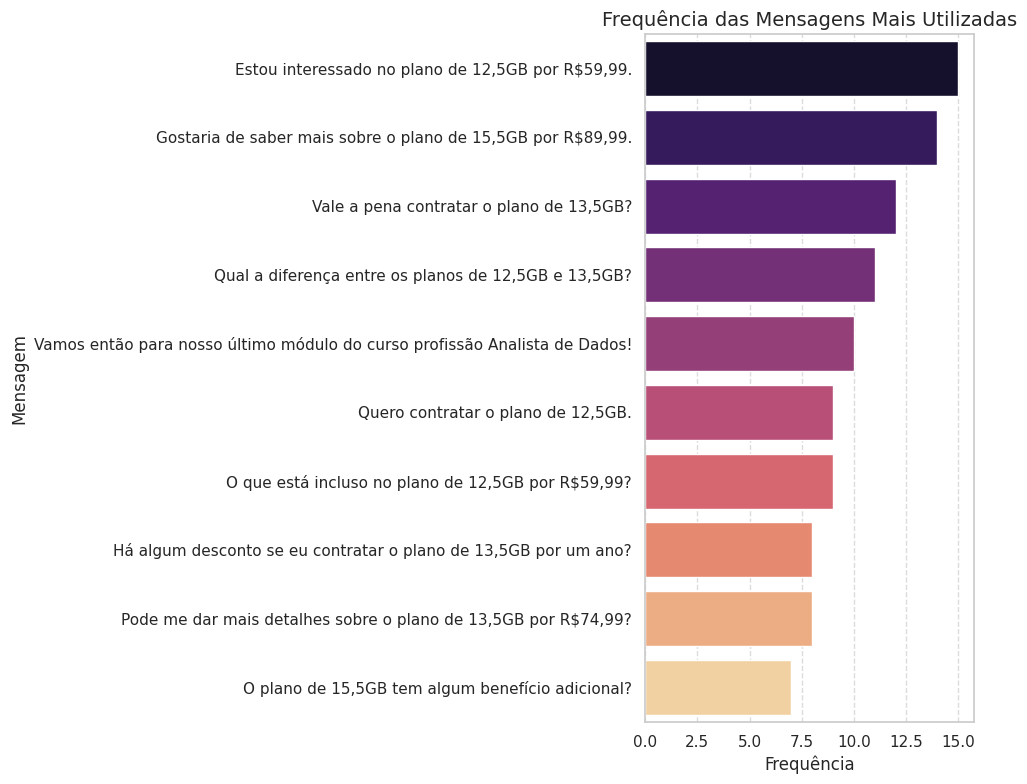

<h2>Insights</h2>
<ul>
  <li><strong>Padrões de Interesse:</strong>
    <ul>
      <li><strong>Planos de Internet:</strong> A maior parte das mensagens gira em torno de planos específicos, como o de 12,5GB (R$59,99) e 13,5GB (R$74,99), evidenciando um grande interesse em detalhes e comparações entre as opções.</li>
      <li><strong>Consulta por Benefícios:</strong> Mensagens como "O plano de 15,5GB tem algum benefício adicional?" demonstram que os usuários buscam mais do que informações básicas, procurando por vantagens extras.</li>
    </ul>
  </li>
</ul>

<h2>Estratégias e Ações</h2>
<ul>
  <li><strong>Foco nos Planos Mais Populares:</strong>
    <ul>
      <li>Fornecer conteúdos mais detalhados sobre os planos de 12,5GB e 13,5GB, incluindo tabelas comparativas e promoções que evidenciem seus benefícios.</li>
      <li>Criar FAQs ou mensagens automáticas para responder rapidamente às perguntas frequentes sobre esses planos, aumentando a satisfação dos usuários.</li>
    </ul>
  </li>
  <li><strong>Incentivar Discussões Sobre Benefícios:</strong>
    <ul>
      <li>Promover campanhas destacando benefícios exclusivos, como bônus de dados ou descontos para planos anuais, atend

## 5\. Conclusão


<p>A integração entre plataformas de análise de dados e o uso de soluções em nuvem, como a AWS, desempenhou um papel essencial neste projeto, resultando em uma otimização significativa das operações empresariais. O emprego da AWS trouxe escalabilidade, flexibilidade e confiabilidade, permitindo ajustes dinâmicos de recursos de acordo com a demanda, enquanto garantiu o processamento e armazenamento seguro dos dados.

A utilização de pipelines na nuvem para análise de dados ampliou a eficiência ao possibilitar o processamento em larga escala e a extração de insights detalhados a partir de informações geradas pelos usuários. Esses insights não apenas refletem padrões de comportamento e preferências, mas também orientam a tomada de decisões estratégicas fundamentadas.

Além disso, a escolha por uma infraestrutura na nuvem ofereceu vantagens como redução de custos operacionais, ao eliminar a necessidade de investimentos em servidores físicos, e maior agilidade na adaptação às mudanças de mercado ou demandas operacionais. A implementação de rigorosos protocolos de segurança também assegurou a proteção de dados sensíveis contra possíveis ameaças, promovendo confiança e estabilidade ao projeto.

Em conclusão, o projeto destaca a importância de uma abordagem sinérgica baseada em tecnologias de análise de dados e computação em nuvem. A aplicação estratégica desses recursos não apenas otimiza a eficiência organizacional, mas também potencializa a inovação e a excelência empresarial, criando soluções que atendem às demandas modernas com precisão e eficácia.</p>